# Old Ablation

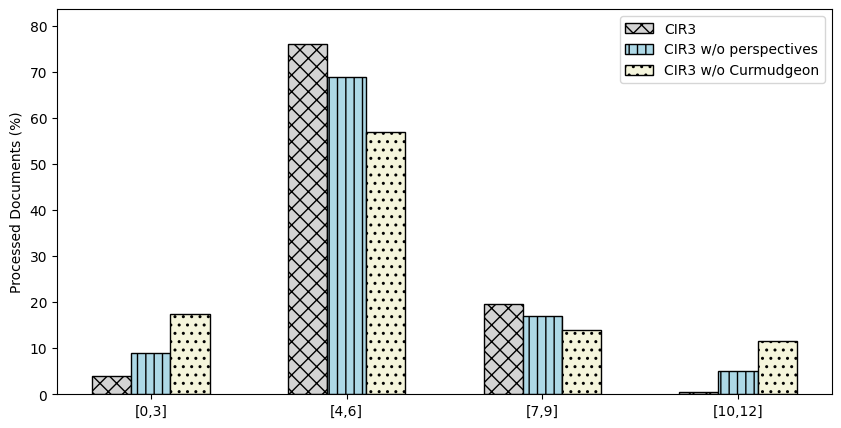

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Define the intervals and corresponding percentages for three models
intervals = ['[0,3]', '[4,6]', '[7,9]', '[10,12]']
cir3 = [04.00, 76.00, 19.50, 00.50]
cir3_no_perspective = [09.00, 69.00, 17.00, 05.00]
cir3_no_curmudgeon = [17.50, 57.00, 14.00, 11.50]

# Combine all percentages into a single list
all_percentages = cir3 + cir3_no_perspective + cir3_no_curmudgeon

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.2  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc']  # Light gray, light blue, beige

# Create the plot
# fig, ax = plt.subplots()
# Adjust the figsize as needed
fig, ax = plt.subplots(figsize=(10, 5))  


bars1 = ax.bar([p - width for p in x], cir3, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax.bar(x, cir3_no_perspective, width=width, label='CIR3 w/o perspectives', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax.bar([p + width for p in x], cir3_no_curmudgeon, width=width, label='CIR3 w/o Curmudgeon', hatch=hatches[2], edgecolor='black', color=colors[2])


# bars1 = ax.bar([p - width for p in x], cir3, width=width, label='CIR3', hatch=hatches[0], edgecolor='black')
# bars2 = ax.bar(x, cir3_no_perspective, width=width, label='CIR3 w/o perspectives', hatch=hatches[1], edgecolor='black')
# bars3 = ax.bar([p + width for p in x], cir3_no_curmudgeon = [17.50, 57.00, 14.00, 11.50], width=width, label='CIR3 w/o Curmudgeon', hatch=hatches[2], edgecolor='black')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(intervals)

# Set the y-axis to display percentage
# ax.yaxis.set_major_formatter(PercentFormatter())

# Set the upper limit of the y-axis slightly above the maximum percentage value
ax.set_ylim(0, max_percentage * 1.1)

# Set the labels and title
# ax.set_xlabel('Cycle Ranges')
ax.set_ylabel('Processed Documents (%)')
# ax.set_title('Context distribution across cycle ranges (%)')

# Add a legend
ax.legend()

# Display the plot
plt.show()

# New Ablation Studies

## Adding different variants of the Curmudgeon strategy: 
1. fixed feedback via Vendi score only, 
2. pure LLM-based critique (e.g., GPT-4 reasoning), 
3. random rejection as a control, and   (should run variation of experiments with p = 0.5 and p = 0.8 for example)
4. Evaluate effectiveness at different convergence phases by plotting QA diversity vs. refinement cycles.

## Adding Comp and Faith scores

In [33]:
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167


# cir3_no_perspective_overall_comp_faith  = (0.9115, 0.9653)
# cir3_no_curmudgeon_overall_comp_faith   = (0.8370, 0.9046)
cir3_overall_comp_faith                 = (0.9528, 0.9895)
cir3_agent_only_overall_comp_faith      = (0.9223, 0.9696)
cir3_vendi_only_overall_comp_faith      = (0.8893, 0.9331)
cir3_random_reject_overall_comp_faith   = (0.8167, 0.8969)

print(f"CIR3 Comp - Faith AVG: {sum(cir3_overall_comp_faith)/len(cir3_overall_comp_faith)}")
print(f"CIR3 Agent Only Comp - Faith AVG: {sum(cir3_agent_only_overall_comp_faith)/len(cir3_agent_only_overall_comp_faith)}")
print(f"CIR3 Vendi Only Comp - Faith AVG: {sum(cir3_vendi_only_overall_comp_faith)/len(cir3_vendi_only_overall_comp_faith)}")
print(f"CIR3 Random Rejection Comp - Faith AVG: {sum(cir3_random_reject_overall_comp_faith)/len(cir3_random_reject_overall_comp_faith)}")

CIR3 Comp - Faith AVG: 0.97115
CIR3 Agent Only Comp - Faith AVG: 0.9459500000000001
CIR3 Vendi Only Comp - Faith AVG: 0.9112
CIR3 Random Rejection Comp - Faith AVG: 0.8568


# TODO ASAP
0. Create a seperate table for Curmudgeon strategies.
    - Amend the value of CIR3 based on the new experiment 200 documents 50 from each dataset.
    - Explain in the setup / discussion about the datasets.
    - Mention that in this setup we used llama for everything **except for Curmudgeon we use gpt 4 mini** 
    - Also add the probability p = 0.35 for agreement / acceptance.
    - Also discussion, add that we observe a strong correlation between Comprehensivness and Vendi diversity scores with all models (vendi was computed aside as eval without being used in CIR3 variations, except for CIR3 Vendi Only and Original CIR3)
1. create a table to count the number of documents in each outer-iteration bucket for *each setup* [0, 2] ; [2, 4] ; [4, 6]
    - Add comp and faith for each bucket and each model.
    - create a plot for this
2. Run the experiments and copy the results: take the count of documents that reached 5 outer-iteration ONLY. (This way the average Comp score and its plotting will make sense).
    - create a plot for this

In [ ]:
#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################

# Define the intervals and corresponding percentages for three models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

print(sum(cir3_doc_count_percent))
print(sum(cir3_agent_only_doc_count_percent))
print(sum(cir3_vendi_only_doc_count_percent))
print(sum(cir3_random_reject_doc_count_percent))
print(f"----------- Comprehensivness scores -----------")


#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
intervals =                                    ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0


100.0
100.0
100.0
100.0
----------- Comprehensivness scores -----------
0.9528333333333334
0.9223
0.8893666666666666
0.8167


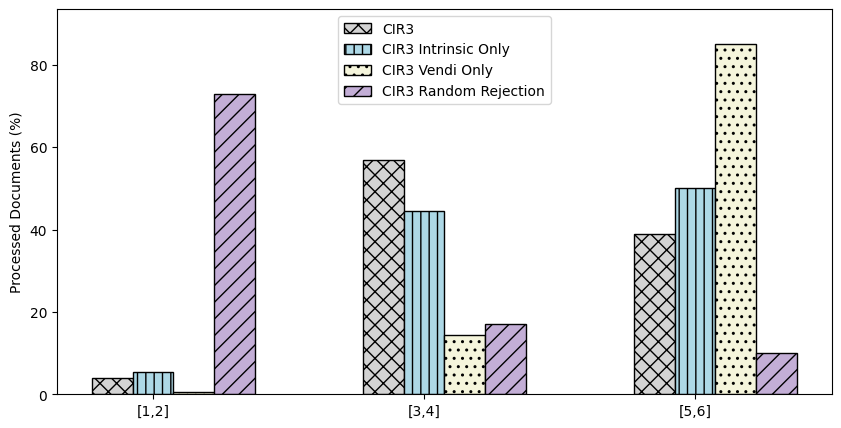

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create the plot
# fig, ax = plt.subplots()
# Adjust the figsize as needed
fig, ax = plt.subplots(figsize=(10, 5))  


bars1 = ax.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])


# bars1 = ax.bar([p - width for p in x], cir3, width=width, label='CIR3', hatch=hatches[0], edgecolor='black')
# bars2 = ax.bar(x, cir3_no_perspective, width=width, label='CIR3 w/o perspectives', hatch=hatches[1], edgecolor='black')
# bars3 = ax.bar([p + width for p in x], cir3_no_curmudgeon = [17.50, 57.00, 14.00, 11.50], width=width, label='CIR3 w/o Curmudgeon', hatch=hatches[2], edgecolor='black')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(intervals)

# Set the y-axis to display percentage
# ax.yaxis.set_major_formatter(PercentFormatter())

# Set the upper limit of the y-axis slightly above the maximum percentage value
ax.set_ylim(0, max_percentage * 1.1)

# Set the labels and title
# ax.set_xlabel('Cycle Ranges')
ax.set_ylabel('Processed Documents (%)')
# ax.set_title('Context distribution across cycle ranges (%)')

# Add a legend
ax.legend()

# Display the plot
plt.show()

### Add scores to the figure

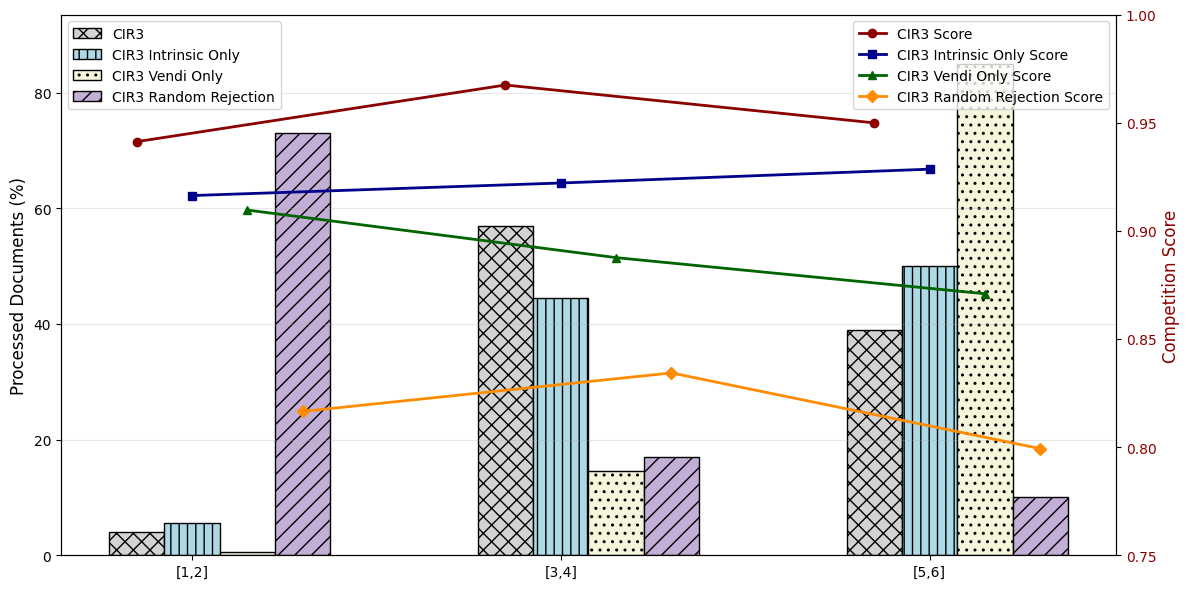

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

# TODO: plot the scores
# intervals =                                    ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create the plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot document count percentages on primary y-axis (left)
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

# Plot competition scores on secondary y-axis (right) as line plots
line1 = ax2.plot([p - width for p in x], cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=2, markersize=6, label='CIR3 Score')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=2, markersize=6, label='CIR3 Intrinsic Only Score')
line3 = ax2.plot([p + width for p in x], cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=2, markersize=6, label='CIR3 Vendi Only Score')
line4 = ax2.plot([p + width * 2 for p in x], cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=2, markersize=6, label='CIR3 Random Rejection Score')

# Set the x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(intervals)

# Set the y-axis limits and labels
ax1.set_ylim(0, max_percentage * 1.1)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)

# Set secondary y-axis limits and labels for scores
ax2.set_ylim(0.75, 1.0)  # Adjust based on your score range
ax2.set_ylabel('Competition Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(lines2, labels2, loc='upper right', bbox_to_anchor=(1, 1))

# Add grid for better readability
ax1.grid(True, alpha=0.3, axis='y')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

## 4 plots

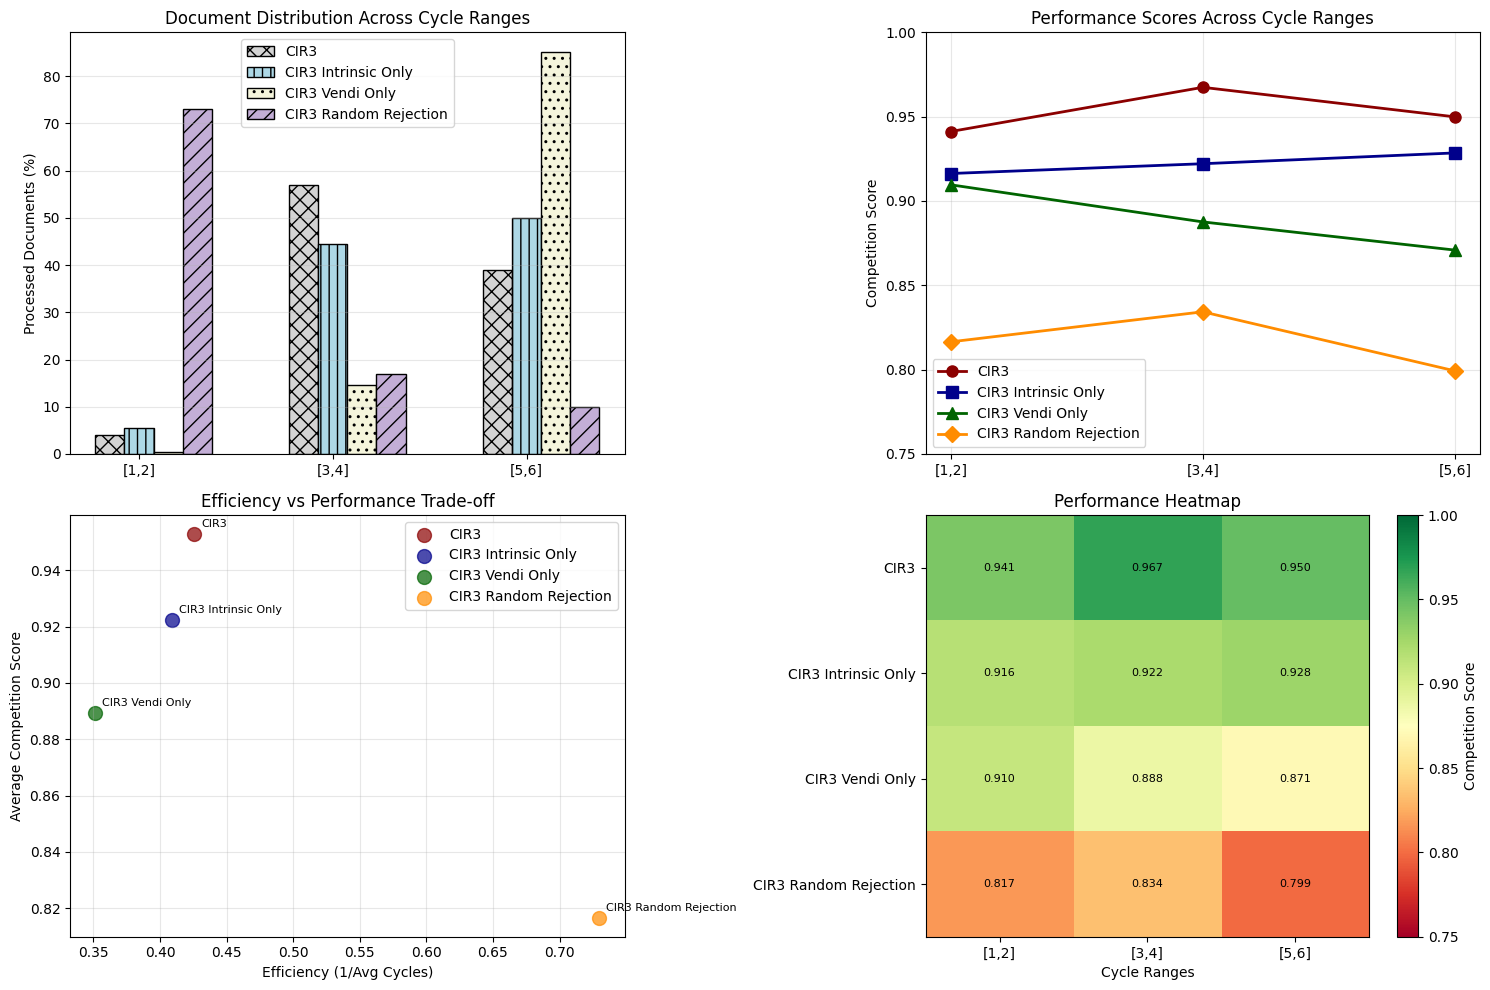

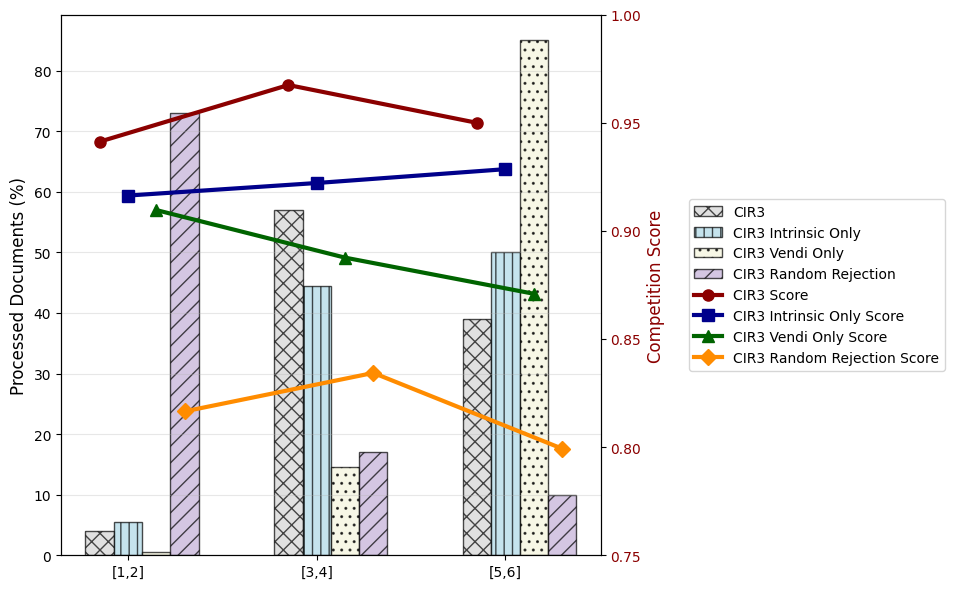

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

# TODO: plot the scores
# intervals =                                    ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)')
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Performance Scores
line1 = ax2.plot(x, cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=2, markersize=8, label='CIR3')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3 = ax2.plot(x, cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4 = ax2.plot(x, cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Competition Score')
ax2.set_title('Performance Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.75, 1.0)

# Plot 3: Efficiency vs Performance Scatter
# Calculate efficiency as inverse of average cycles (lower cycles = higher efficiency)
efficiency_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
efficiency_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
efficiency_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
efficiency_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

efficiencies = [efficiency_cir3, efficiency_agent, efficiency_vendi, efficiency_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (eff, score, label, color) in enumerate(zip(efficiencies, avg_scores, labels, colors_scatter)):
    ax3.scatter(eff, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(label, (eff, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Efficiency (1/Avg Cycles)')
ax3.set_ylabel('Average Competition Score')
ax3.set_title('Efficiency vs Performance Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Performance Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Performance Heatmap')
plt.colorbar(im, ax=ax4, label='Competition Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
line1 = ax2.plot([p - width for p in x], cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=3, markersize=8, label='CIR3 Score')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=3, markersize=8, label='CIR3 Intrinsic Only Score')
line3 = ax2.plot([p + width for p in x], cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=3, markersize=8, label='CIR3 Vendi Only Score')
line4 = ax2.plot([p + width * 2 for p in x], cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=3, markersize=8, label='CIR3 Random Rejection Score')

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Competition Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 4 plots V2

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.426
CIR3 Intrinsic Only: 0.409
CIR3 Vendi Only: 0.351
CIR3 Random Rejection: 0.730


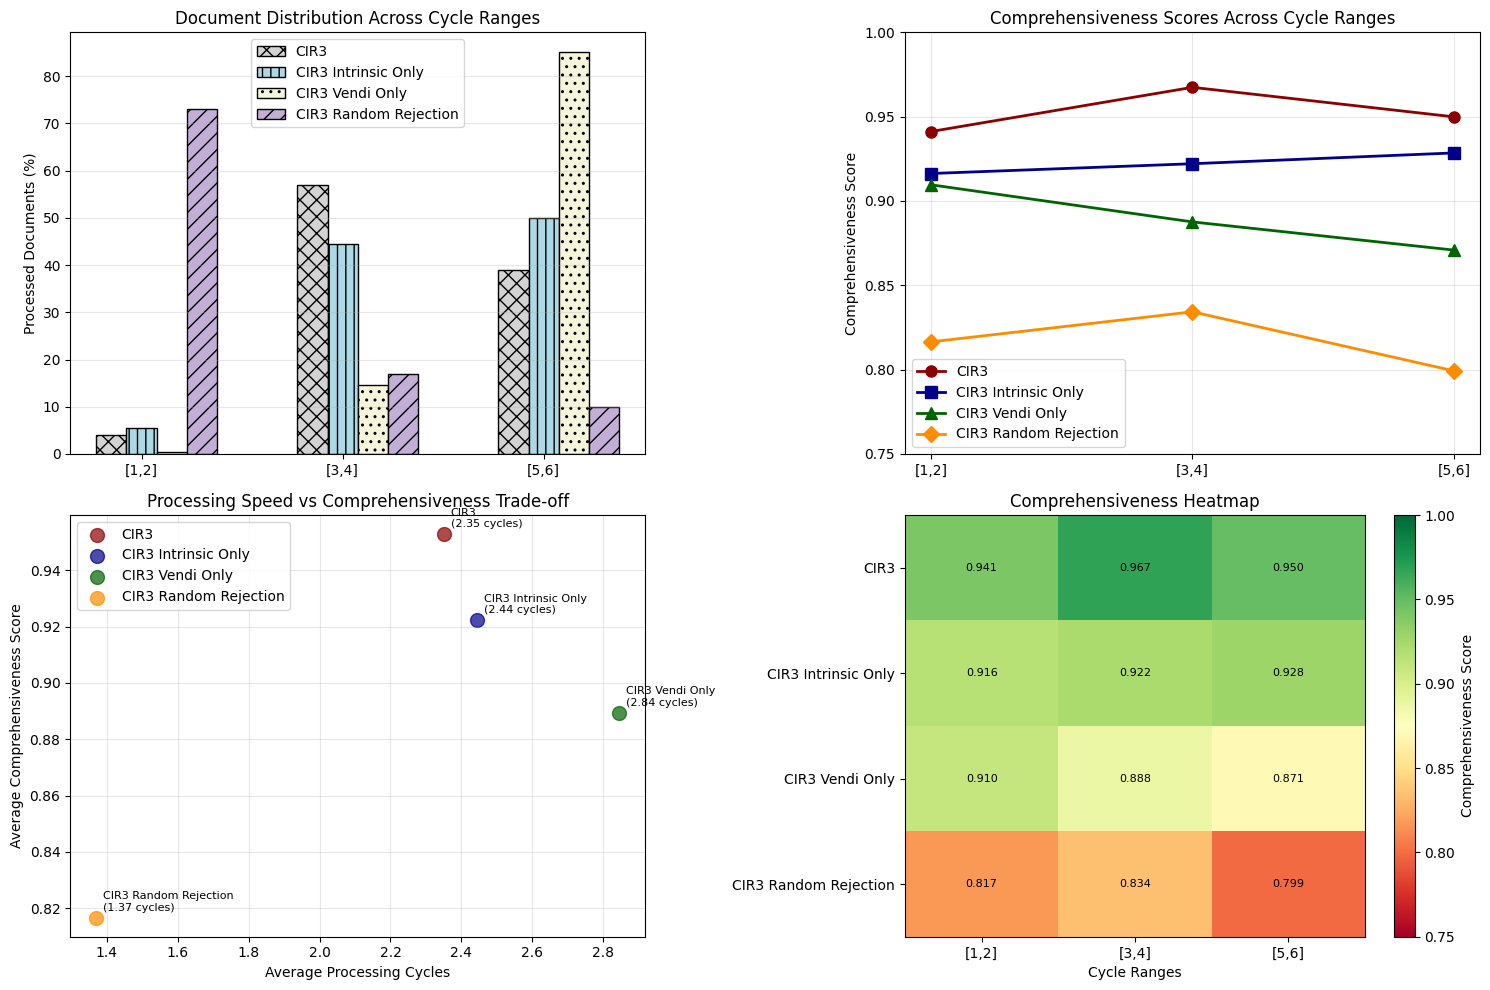

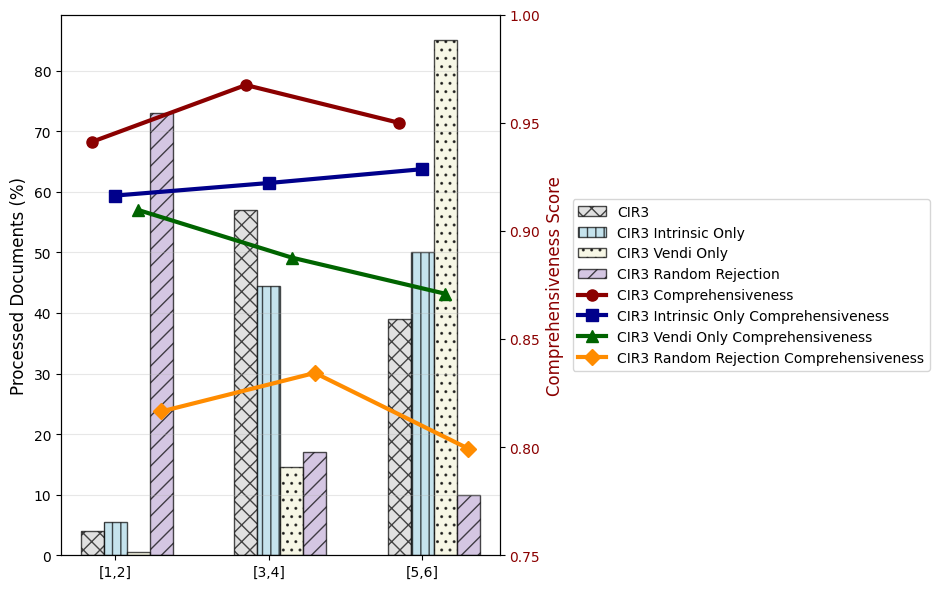

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

# TODO: plot the scores
# intervals =                                    ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)')
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Performance Scores
line1 = ax2.plot(x, cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=2, markersize=8, label='CIR3')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3 = ax2.plot(x, cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4 = ax2.plot(x, cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score')
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.75, 1.0)

# Plot 3: Efficiency vs Performance Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.3f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.3f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.3f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.3f}")

# Plot 4: Performance Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
line1 = ax2.plot([p - width for p in x], cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=3, markersize=8, label='CIR3 Comprehensiveness')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=3, markersize=8, label='CIR3 Intrinsic Only Comprehensiveness')
line3 = ax2.plot([p + width for p in x], cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=3, markersize=8, label='CIR3 Vendi Only Comprehensiveness')
line4 = ax2.plot([p + width * 2 for p in x], cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=3, markersize=8, label='CIR3 Random Rejection Comprehensiveness')

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 4 Plots V3 (the same as V2 but seperate)

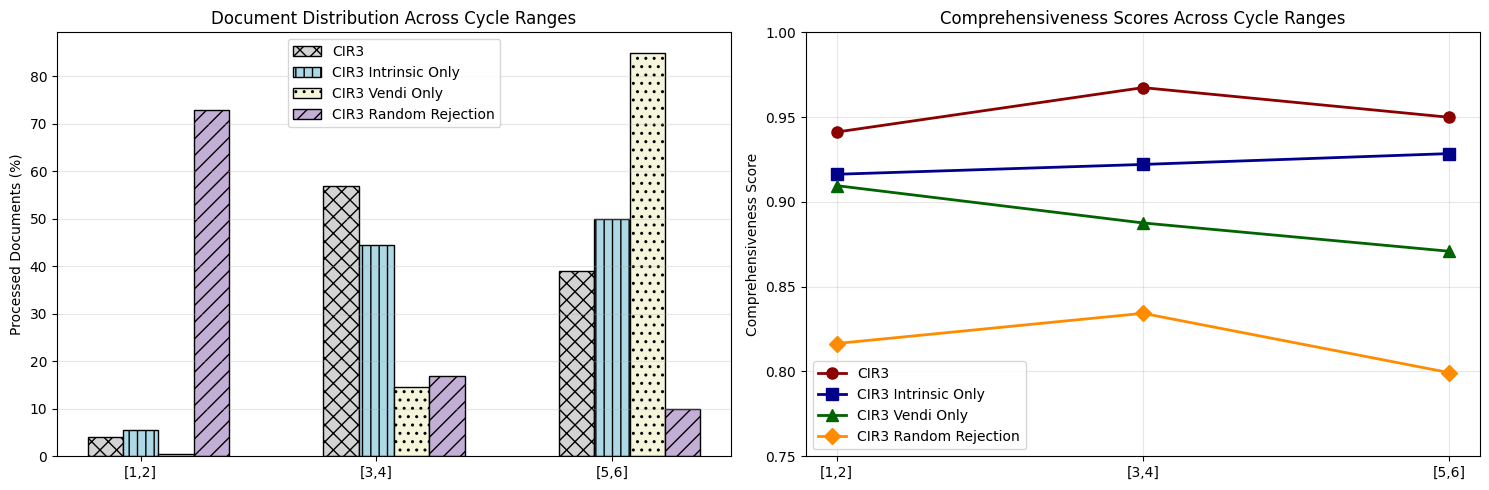

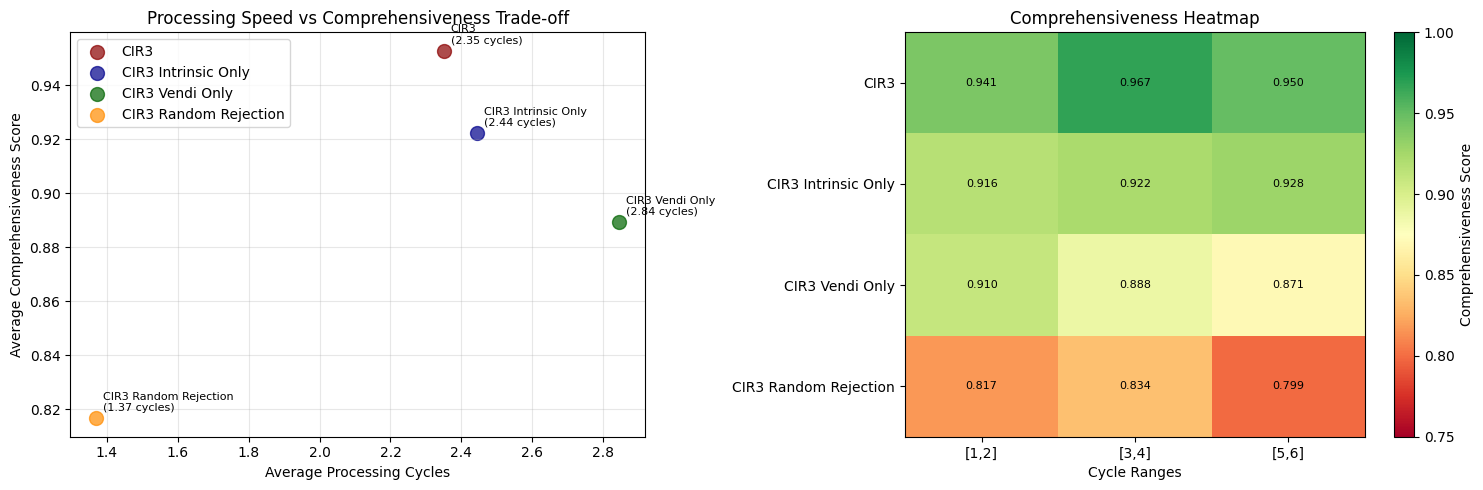

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.426
CIR3 Intrinsic Only: 0.409
CIR3 Vendi Only: 0.351
CIR3 Random Rejection: 0.730


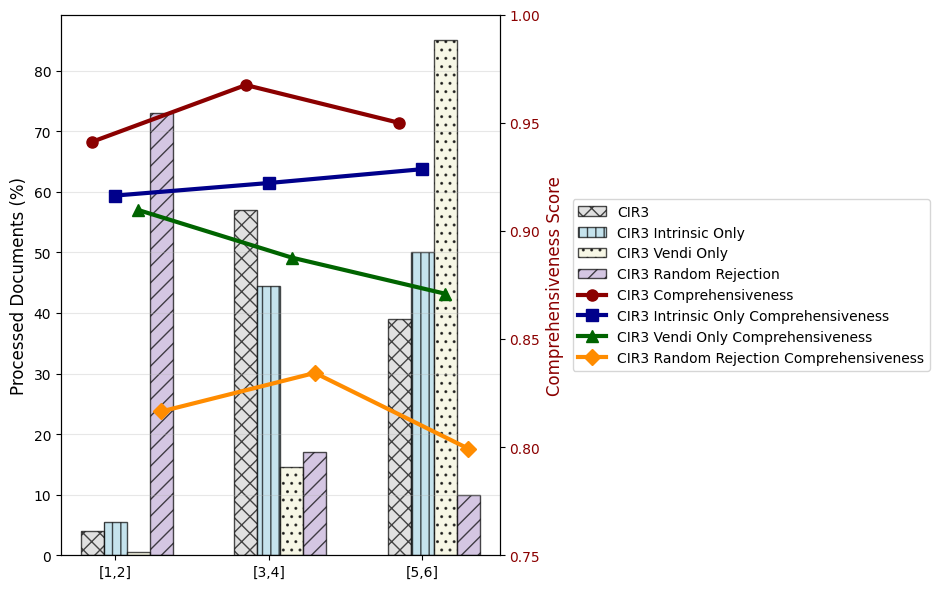

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

# TODO: plot the scores
# intervals =                                    ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)')
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
line1 = ax2.plot(x, cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=2, markersize=8, label='CIR3')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3 = ax2.plot(x, cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4 = ax2.plot(x, cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score')
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.3f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.3f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.3f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.3f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
line1 = ax2.plot([p - width for p in x], cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=3, markersize=8, label='CIR3 Comprehensiveness')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=3, markersize=8, label='CIR3 Intrinsic Only Comprehensiveness')
line3 = ax2.plot([p + width for p in x], cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=3, markersize=8, label='CIR3 Vendi Only Comprehensiveness')
line4 = ax2.plot([p + width * 2 for p in x], cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=3, markersize=8, label='CIR3 Random Rejection Comprehensiveness')

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## ALL PLOTS V5

0.9528333333333334
0.9223
0.8893666666666666
0.8167


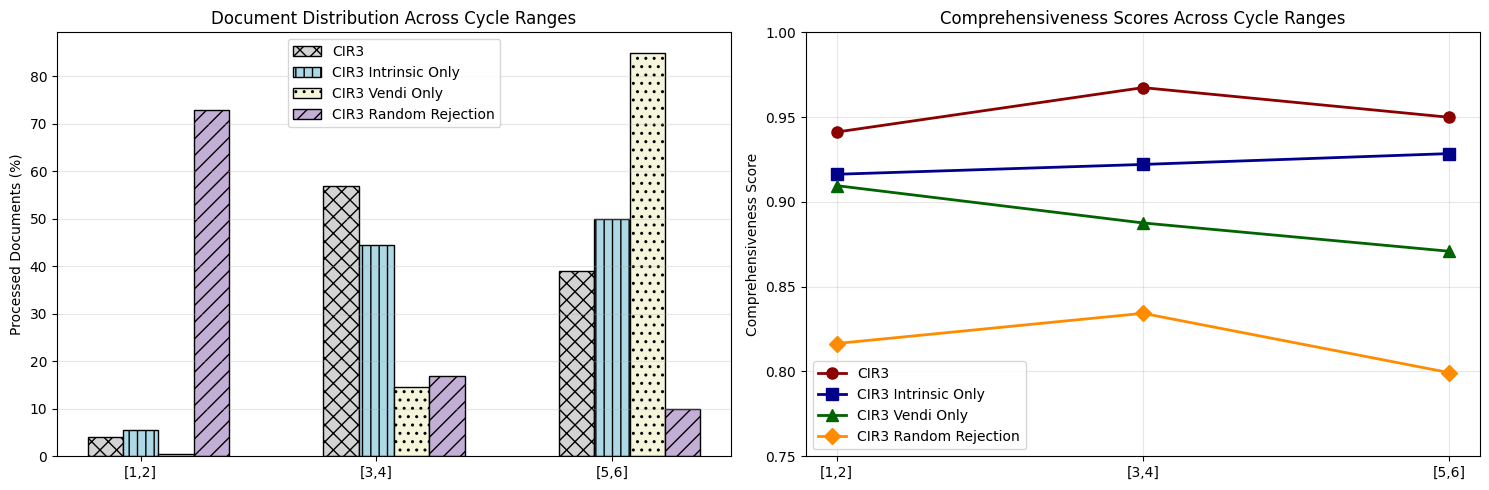

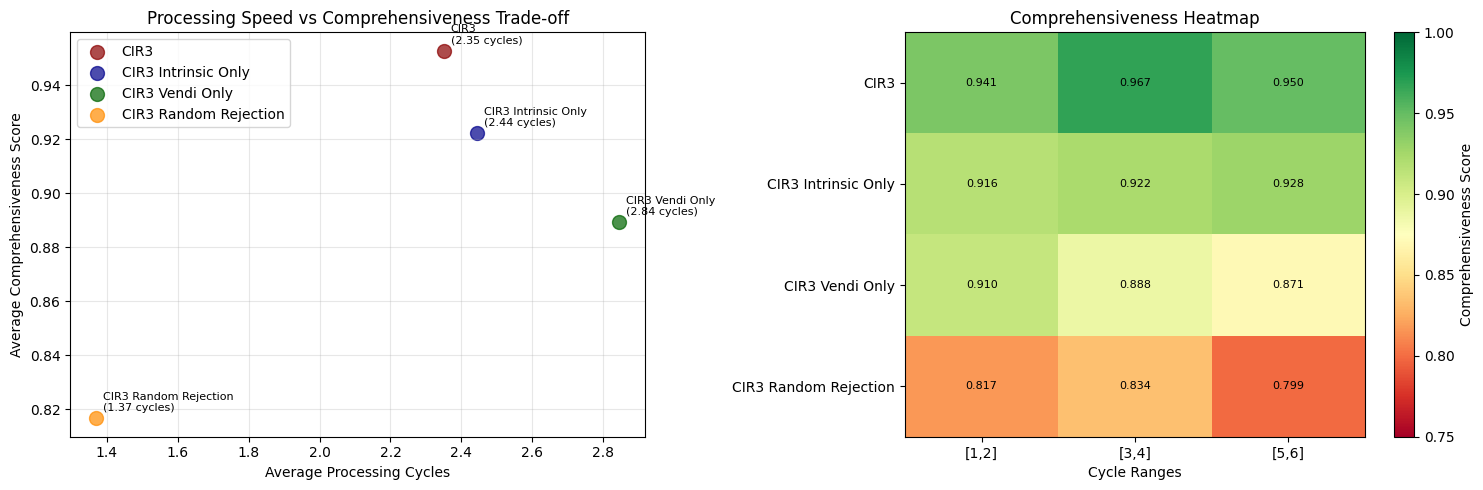

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.426
CIR3 Intrinsic Only: 0.409
CIR3 Vendi Only: 0.351
CIR3 Random Rejection: 0.730


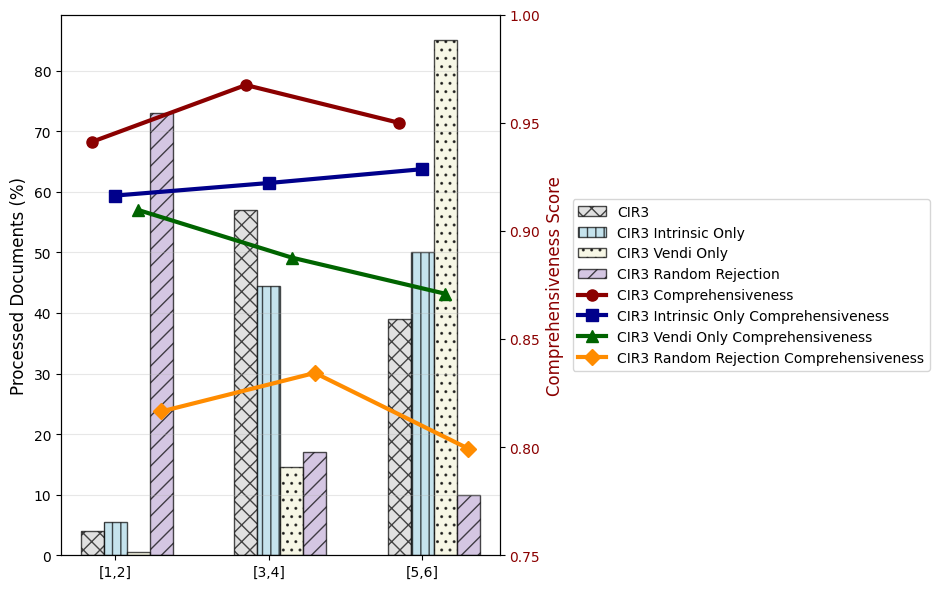

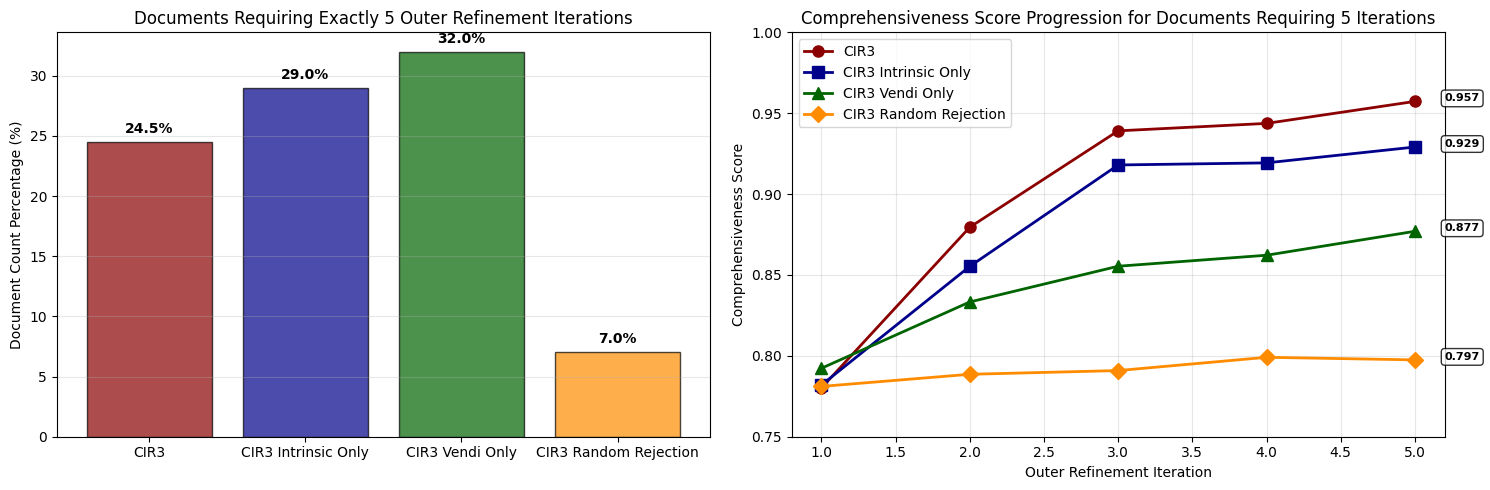


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.957
  CIR3 Intrinsic Only: 0.929
  CIR3 Vendi Only: 0.877
  CIR3 Random Rejection: 0.797

Score Improvement (from iteration 1 to 5):
  CIR3: 0.177 (0.780 → 0.957)
  CIR3 Intrinsic Only: 0.147 (0.782 → 0.929)
  CIR3 Vendi Only: 0.085 (0.792 → 0.877)
  CIR3 Random Rejection: 0.016 (0.781 → 0.797)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)')
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
line1 = ax2.plot(x, cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=2, markersize=8, label='CIR3')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3 = ax2.plot(x, cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4 = ax2.plot(x, cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score')
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.3f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.3f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.3f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.3f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
line1 = ax2.plot([p - width for p in x], cir3_comp_scores_per_interval, 'o-', color='darkred', linewidth=3, markersize=8, label='CIR3 Comprehensiveness')
line2 = ax2.plot(x, cir3_agent_only_comp_scores_per_interval, 's-', color='darkblue', linewidth=3, markersize=8, label='CIR3 Intrinsic Only Comprehensiveness')
line3 = ax2.plot([p + width for p in x], cir3_vendi_only_comp_scores_per_interval, '^-', color='darkgreen', linewidth=3, markersize=8, label='CIR3 Vendi Only Comprehensiveness')
line4 = ax2.plot([p + width * 2 for p in x], cir3_random_reject_comp_scores_per_interval, 'D-', color='darkorange', linewidth=3, markersize=8, label='CIR3 Random Rejection Comprehensiveness')

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, edgecolor='black')
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

for i, (score, name) in enumerate(zip(final_scores, model_names)):
    ax6.annotate(f'{score:.3f}', (5, score), xytext=(5.2, score), 
                textcoords='data', fontsize=8, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.3f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.3f} ({scores[0]:.3f} → {scores[-1]:.3f})")

## ALL PLOTS V6

0.9528333333333334
0.9223
0.8893666666666666
0.8167


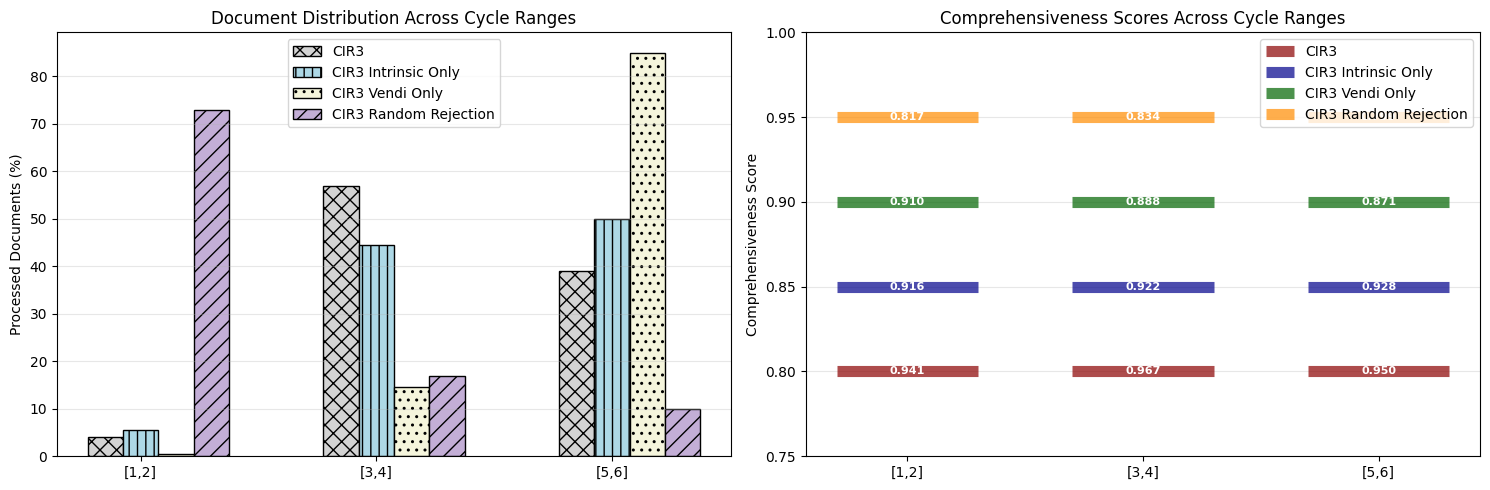

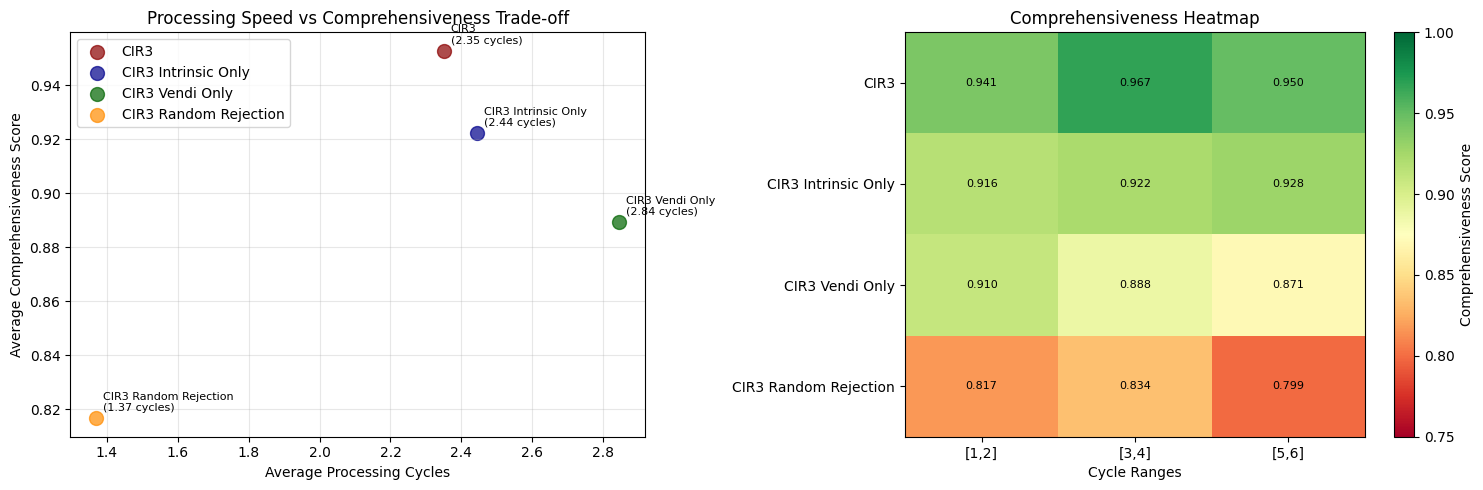

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.426
CIR3 Intrinsic Only: 0.409
CIR3 Vendi Only: 0.351
CIR3 Random Rejection: 0.730


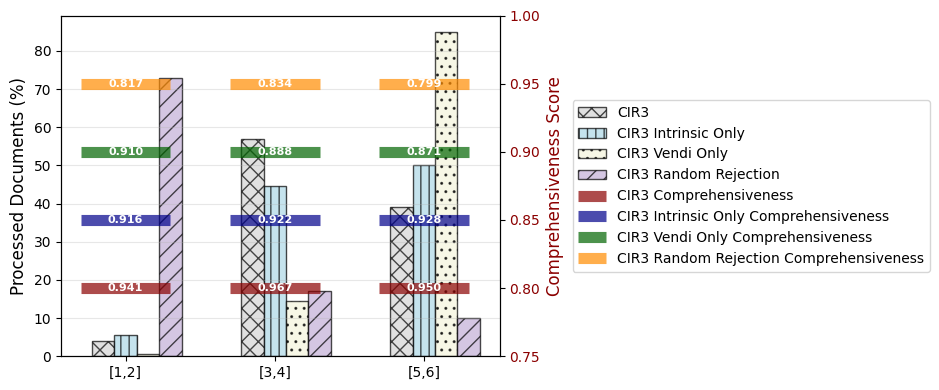

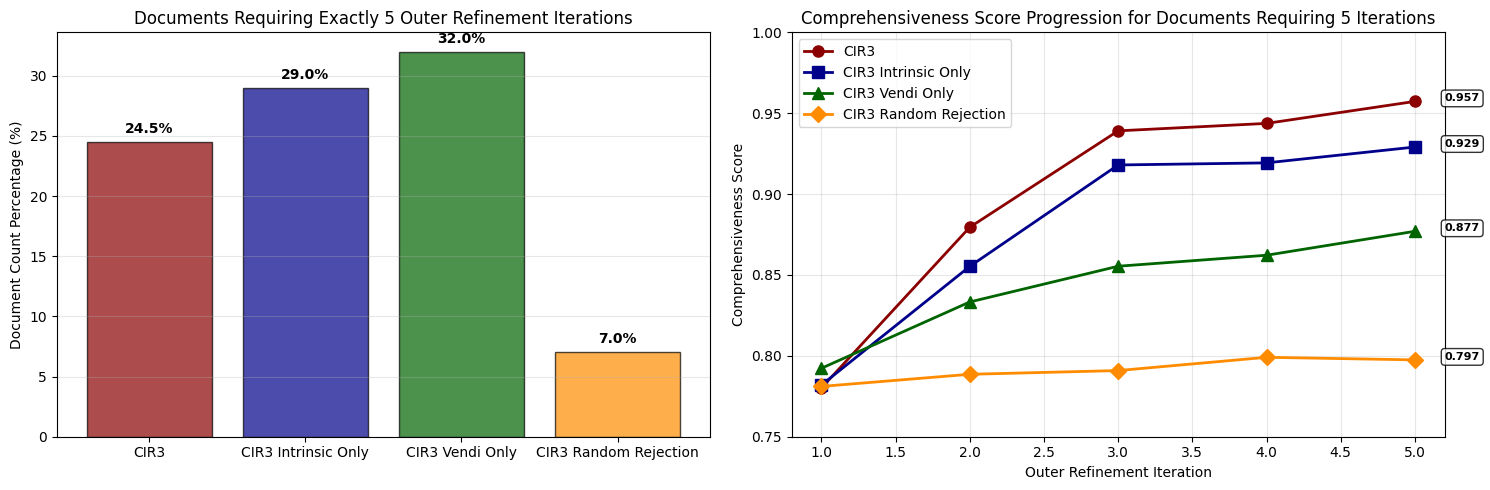


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.957
  CIR3 Intrinsic Only: 0.929
  CIR3 Vendi Only: 0.877
  CIR3 Random Rejection: 0.797

Score Improvement (from iteration 1 to 5):
  CIR3: 0.177 (0.780 → 0.957)
  CIR3 Intrinsic Only: 0.147 (0.782 → 0.929)
  CIR3 Vendi Only: 0.085 (0.792 → 0.877)
  CIR3 Random Rejection: 0.016 (0.781 → 0.797)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)')
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use horizontal line segments to show discrete scores for each interval
y_positions = [0.8, 0.85, 0.9, 0.95]  # Different y-positions for each model
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']

for i, (scores, label, color, y_pos) in enumerate(zip(comp_data, labels_comp, colors_comp, y_positions)):
    # Plot horizontal lines for each interval
    for j, score in enumerate(scores):
        ax2.hlines(y=y_pos, xmin=j-0.3, xmax=j+0.3, colors=color, linewidth=8, alpha=0.7, label=label if j==0 else "")
        # Add score value as text
        ax2.text(j, y_pos, f'{score:.3f}', ha='center', va='center', fontsize=8, fontweight='bold', color='white')

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score')
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.3f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.3f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.3f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.3f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use horizontal line segments to show discrete scores for each interval
y_positions_dual = [0.8, 0.85, 0.9, 0.95]  # Different y-positions for each model
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']

for i, (scores, label, color, y_pos) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, y_positions_dual)):
    # Plot horizontal lines for each interval
    for j, score in enumerate(scores):
        ax2.hlines(y=y_pos, xmin=j-0.3, xmax=j+0.3, colors=color, linewidth=8, alpha=0.7, label=label if j==0 else "")
        # Add score value as text
        ax2.text(j, y_pos, f'{score:.3f}', ha='center', va='center', fontsize=8, fontweight='bold', color='white')

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, edgecolor='black')
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

for i, (score, name) in enumerate(zip(final_scores, model_names)):
    ax6.annotate(f'{score:.3f}', (5, score), xytext=(5.2, score), 
                textcoords='data', fontsize=8, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.3f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.3f} ({scores[0]:.3f} → {scores[-1]:.3f})")

## ALL PLOTS V7

0.9528333333333334
0.9223
0.8893666666666666
0.8167


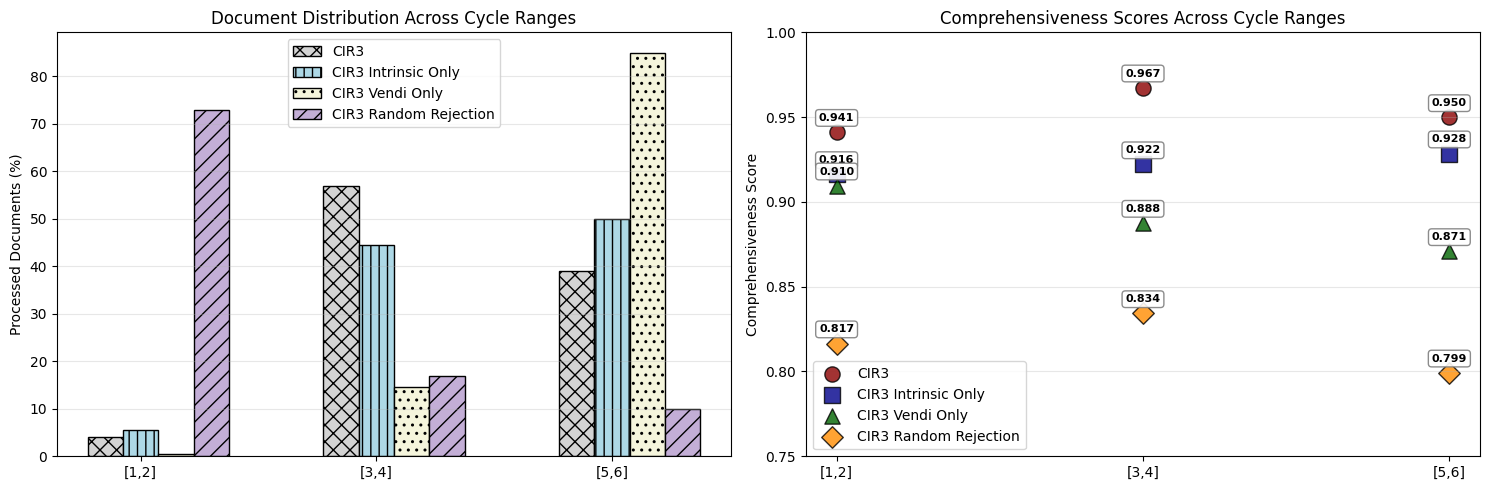

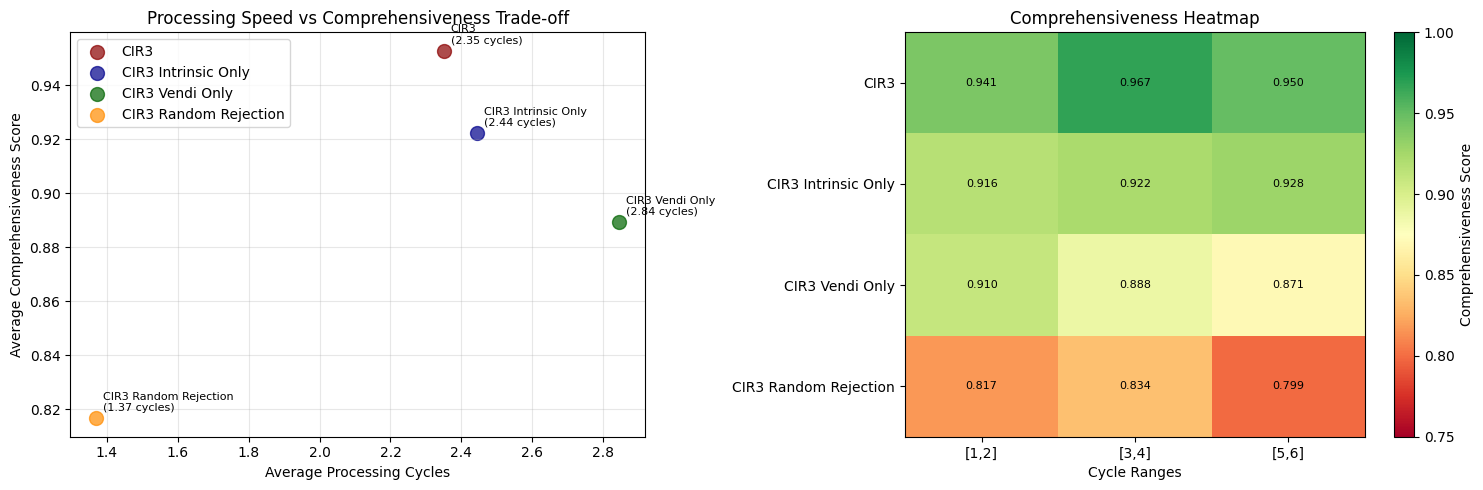

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.426
CIR3 Intrinsic Only: 0.409
CIR3 Vendi Only: 0.351
CIR3 Random Rejection: 0.730


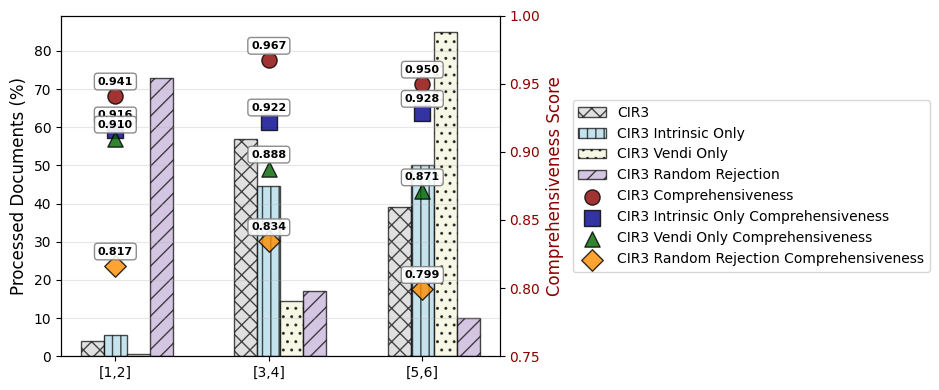

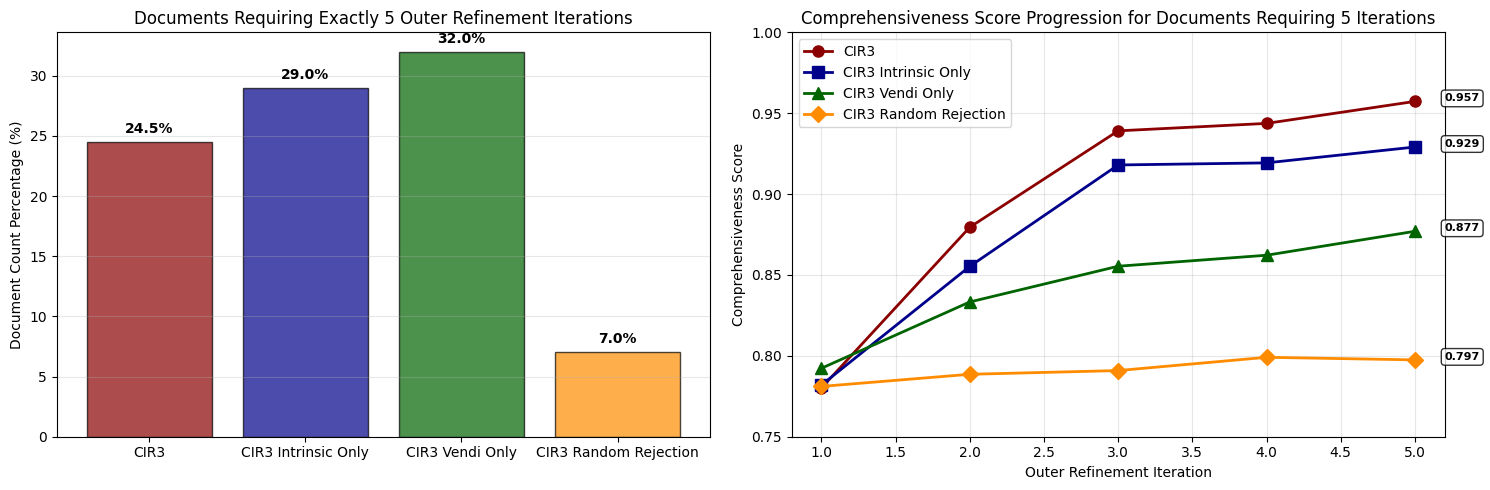


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.957
  CIR3 Intrinsic Only: 0.929
  CIR3 Vendi Only: 0.877
  CIR3 Random Rejection: 0.797

Score Improvement (from iteration 1 to 5):
  CIR3: 0.177 (0.780 → 0.957)
  CIR3 Intrinsic Only: 0.147 (0.782 → 0.929)
  CIR3 Vendi Only: 0.085 (0.792 → 0.877)
  CIR3 Random Rejection: 0.016 (0.781 → 0.797)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)')
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use dots/points to show discrete scores for each interval
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
markers = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data, labels_comp, colors_comp, markers)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.3f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score')
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.3f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.3f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.3f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.3f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use dots/points to show discrete scores for each interval
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']
markers_dual = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, markers_dual)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.3f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, edgecolor='black')
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

for i, (score, name) in enumerate(zip(final_scores, model_names)):
    ax6.annotate(f'{score:.3f}', (5, score), xytext=(5.2, score), 
                textcoords='data', fontsize=8, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.3f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.3f} ({scores[0]:.3f} → {scores[-1]:.3f})")

## ALL PLOTS V9

0.9528333333333334
0.9223
0.8893666666666666
0.8167


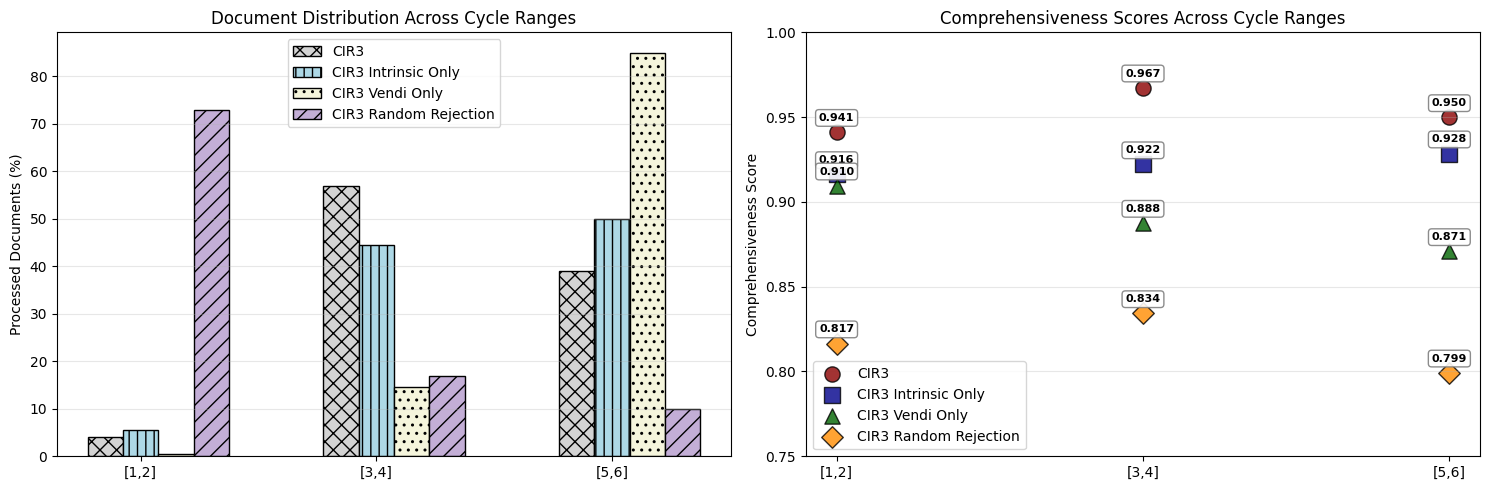

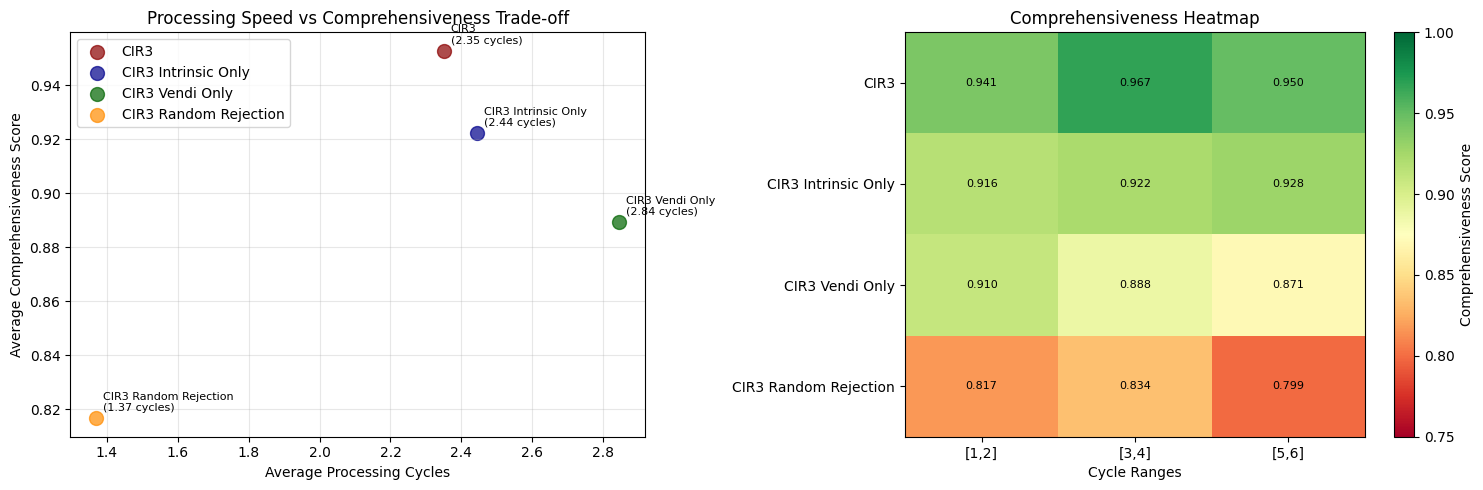

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.426
CIR3 Intrinsic Only: 0.409
CIR3 Vendi Only: 0.351
CIR3 Random Rejection: 0.730


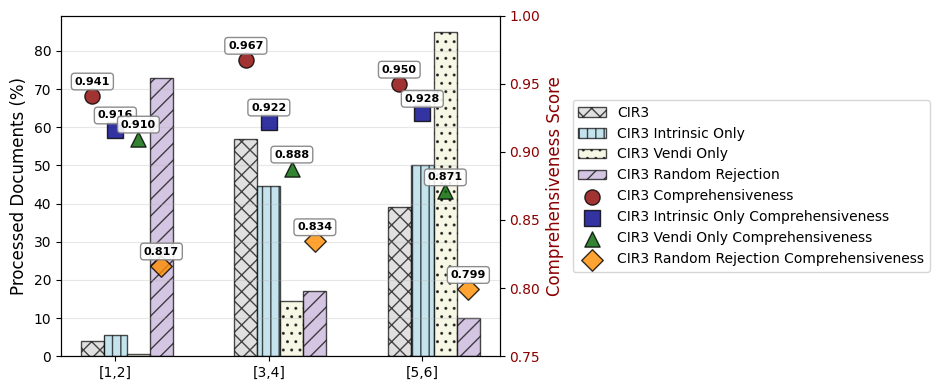

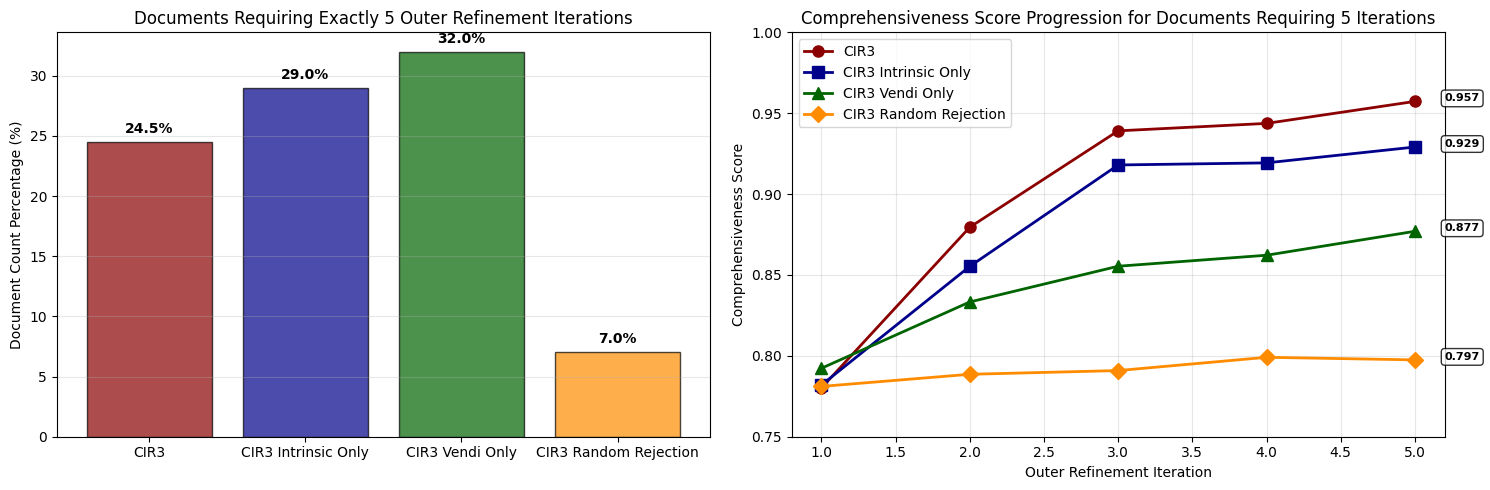


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.957
  CIR3 Intrinsic Only: 0.929
  CIR3 Vendi Only: 0.877
  CIR3 Random Rejection: 0.797

Score Improvement (from iteration 1 to 5):
  CIR3: 0.177 (0.780 → 0.957)
  CIR3 Intrinsic Only: 0.147 (0.782 → 0.929)
  CIR3 Vendi Only: 0.085 (0.792 → 0.877)
  CIR3 Random Rejection: 0.016 (0.781 → 0.797)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)')
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use dots/points to show discrete scores for each interval
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
markers = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data, labels_comp, colors_comp, markers)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.3f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score')
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.3f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.3f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.3f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.3f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use dots/points to show discrete scores for each interval, positioned above corresponding bars
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']
markers_dual = ['o', 's', '^', 'D']

# Position dots above their corresponding bars
bar_positions = [[p - width for p in x], x, [p + width for p in x], [p + width * 2 for p in x]]

for i, (scores, label, color, marker, bar_pos) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, markers_dual, bar_positions)):
    # Plot dots for each interval, positioned above corresponding bars
    ax2.scatter(bar_pos, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, (score, pos) in enumerate(zip(scores, bar_pos)):
        ax2.annotate(f'{score:.3f}', (pos, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xticks(x)
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, edgecolor='black')
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

for i, (score, name) in enumerate(zip(final_scores, model_names)):
    ax6.annotate(f'{score:.3f}', (5, score), xytext=(5.2, score), 
                textcoords='data', fontsize=8, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.3f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.3f} ({scores[0]:.3f} → {scores[-1]:.3f})")

## All plots V 10

0.9528333333333334
0.9223
0.8893666666666666
0.8167


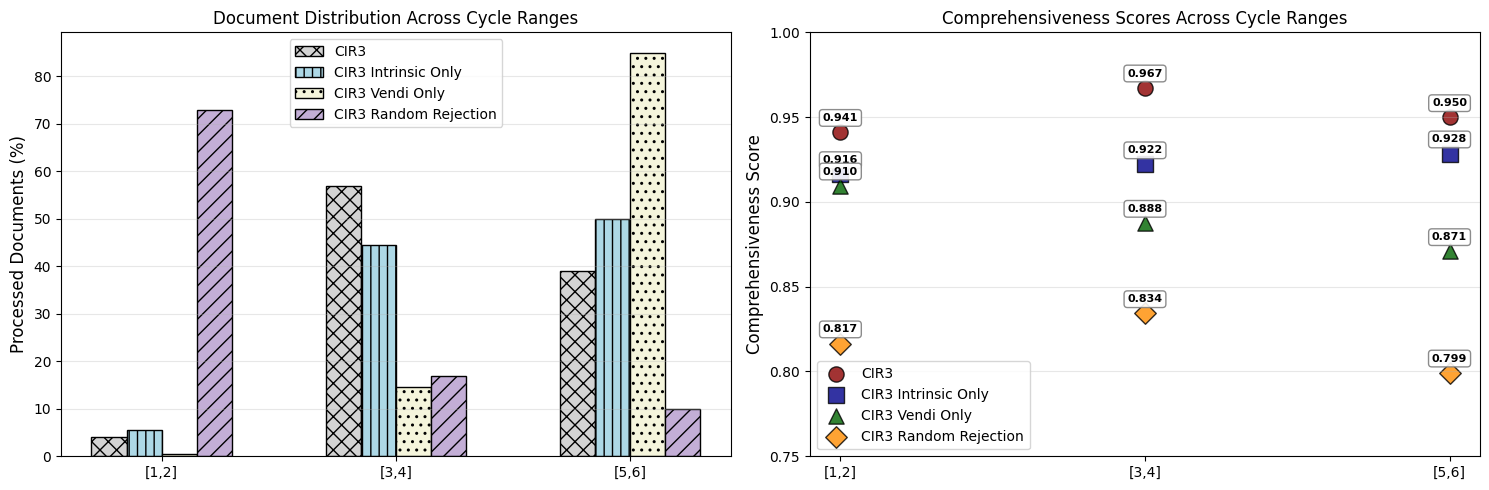

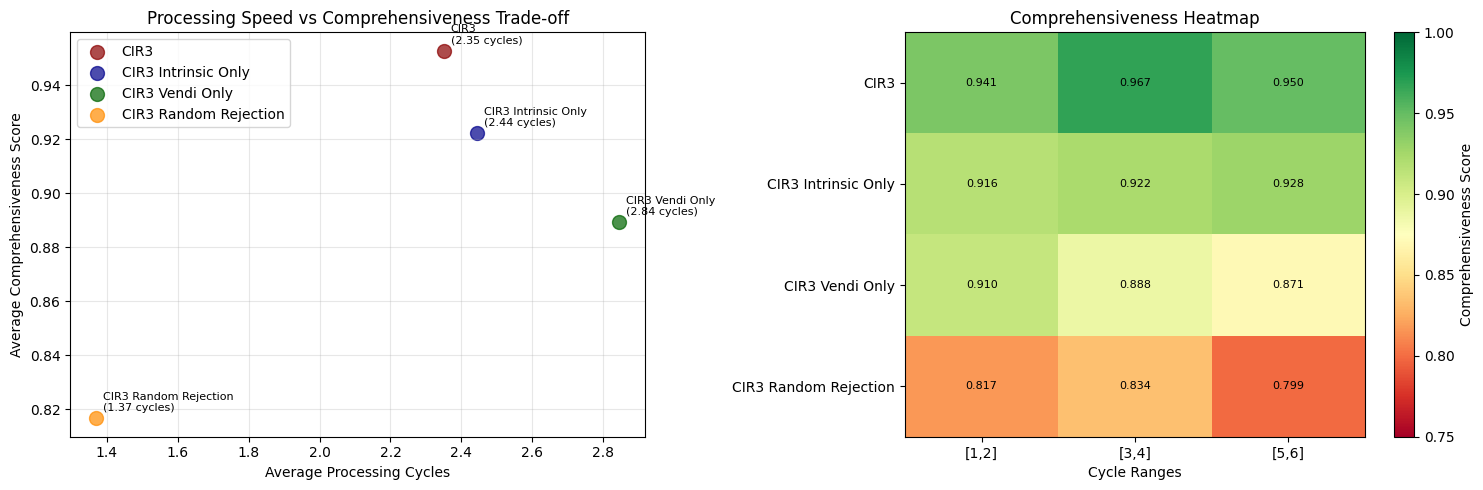

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.426
CIR3 Intrinsic Only: 0.409
CIR3 Vendi Only: 0.351
CIR3 Random Rejection: 0.730


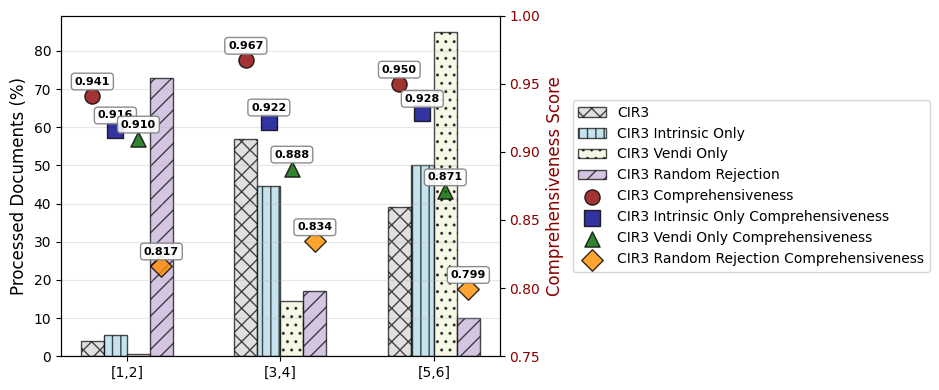

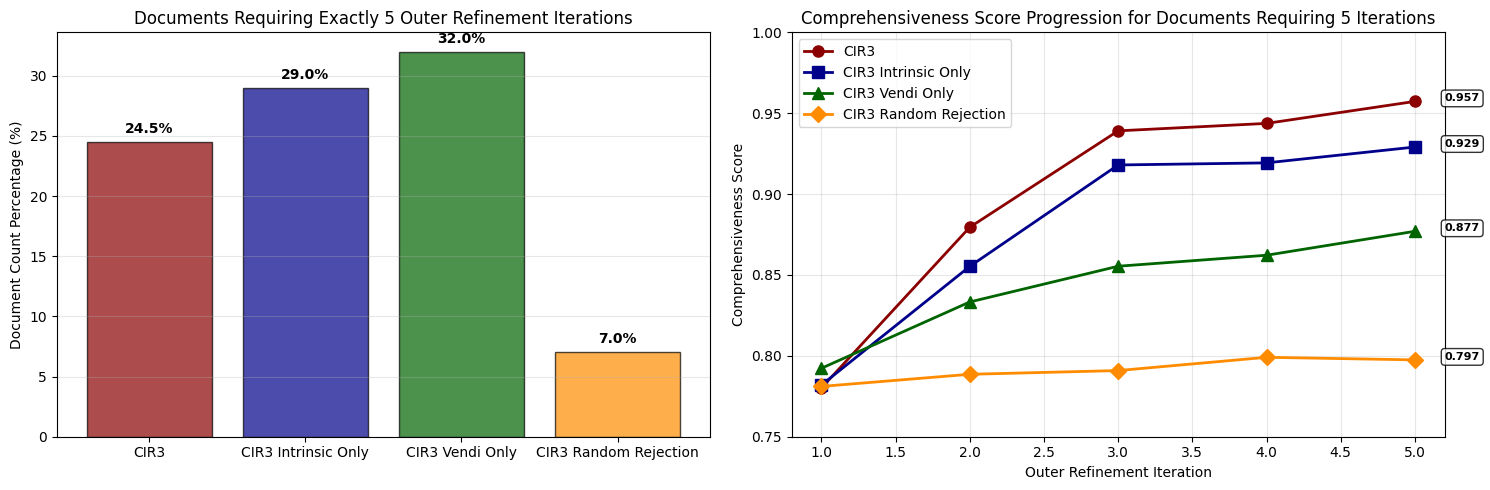


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.957
  CIR3 Intrinsic Only: 0.929
  CIR3 Vendi Only: 0.877
  CIR3 Random Rejection: 0.797

Score Improvement (from iteration 1 to 5):
  CIR3: 0.177 (0.780 → 0.957)
  CIR3 Intrinsic Only: 0.147 (0.782 → 0.929)
  CIR3 Vendi Only: 0.085 (0.792 → 0.877)
  CIR3 Random Rejection: 0.016 (0.781 → 0.797)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use dots/points to show discrete scores for each interval
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
markers = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data, labels_comp, colors_comp, markers)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.3f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12)
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.3f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.3f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.3f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.3f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use dots/points to show discrete scores for each interval, positioned above corresponding bars
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']
markers_dual = ['o', 's', '^', 'D']

# Position dots above their corresponding bars
bar_positions = [[p - width for p in x], x, [p + width for p in x], [p + width * 2 for p in x]]

for i, (scores, label, color, marker, bar_pos) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, markers_dual, bar_positions)):
    # Plot dots for each interval, positioned above corresponding bars
    ax2.scatter(bar_pos, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, (score, pos) in enumerate(zip(scores, bar_pos)):
        ax2.annotate(f'{score:.3f}', (pos, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, edgecolor='black')
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

for i, (score, name) in enumerate(zip(final_scores, model_names)):
    ax6.annotate(f'{score:.3f}', (5, score), xytext=(5.2, score), 
                textcoords='data', fontsize=8, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.3f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.3f} ({scores[0]:.3f} → {scores[-1]:.3f})")

## ALL PLOTS V13

0.9528333333333334
0.9223
0.8893666666666666
0.8167


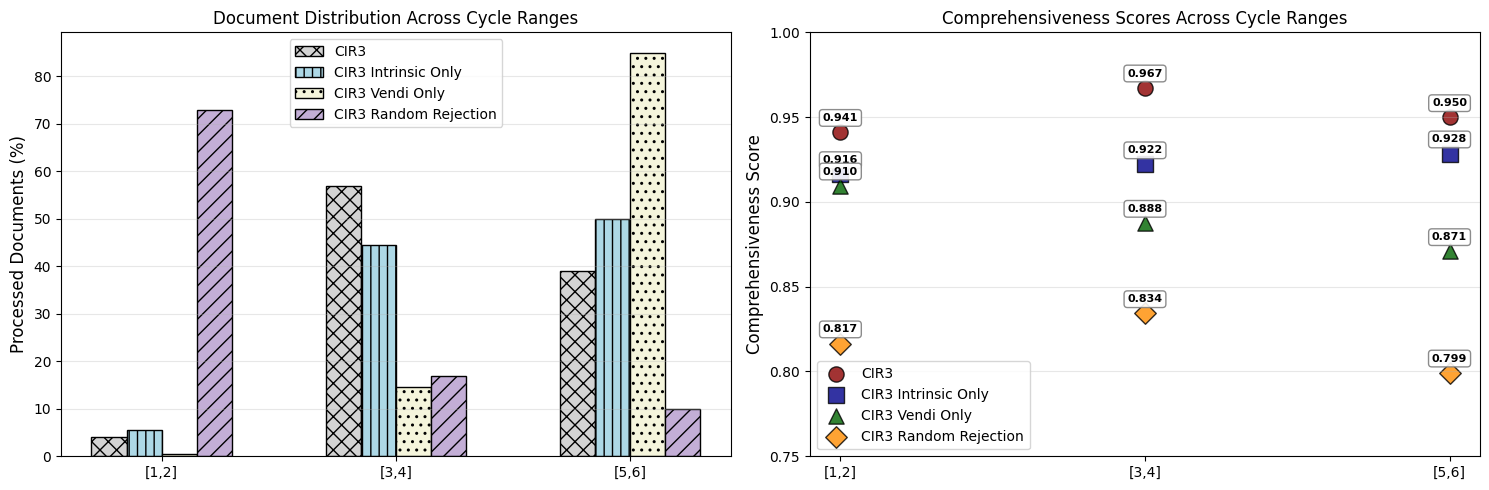

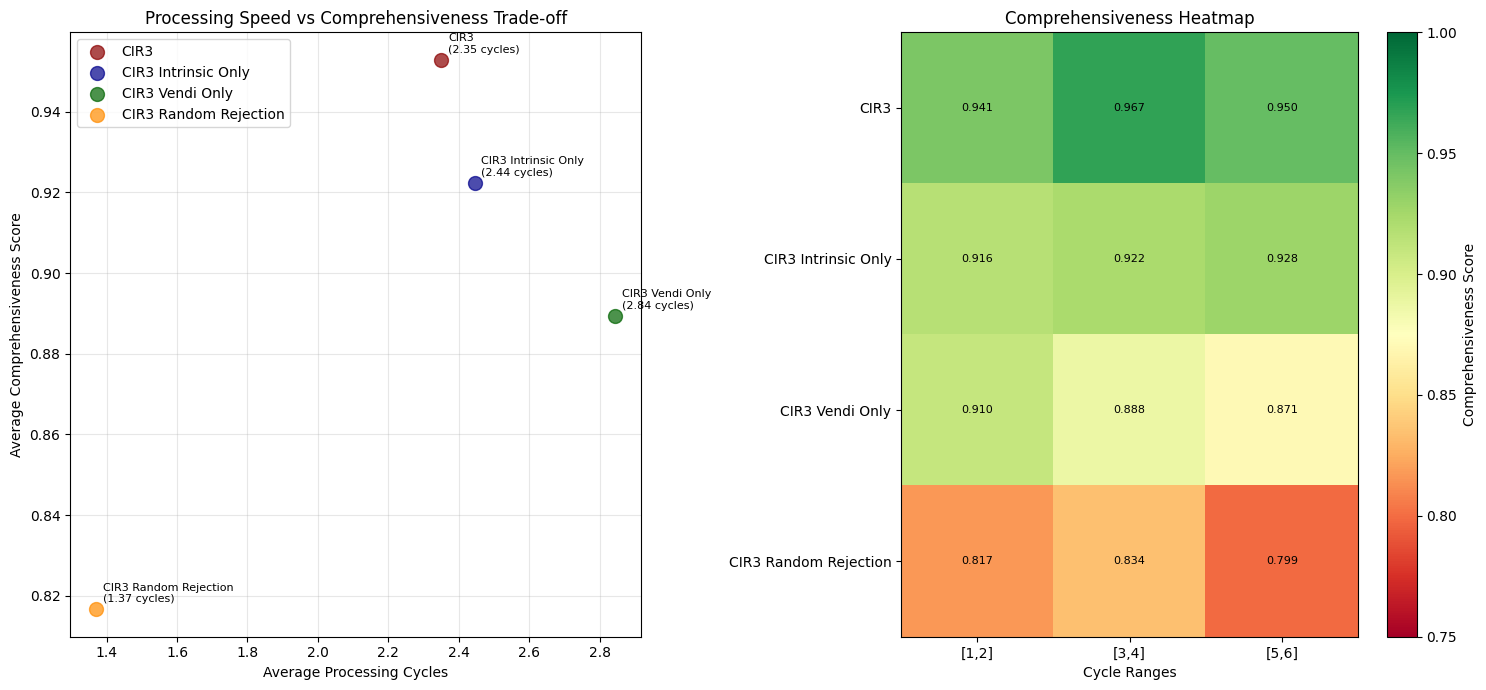

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.426
CIR3 Intrinsic Only: 0.409
CIR3 Vendi Only: 0.351
CIR3 Random Rejection: 0.730


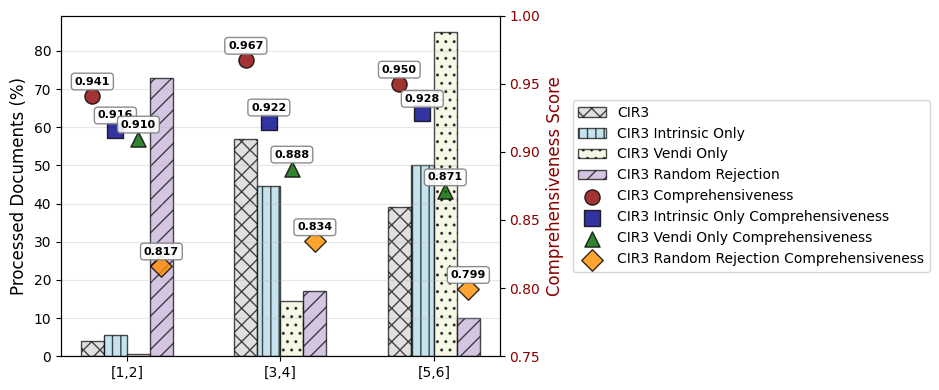

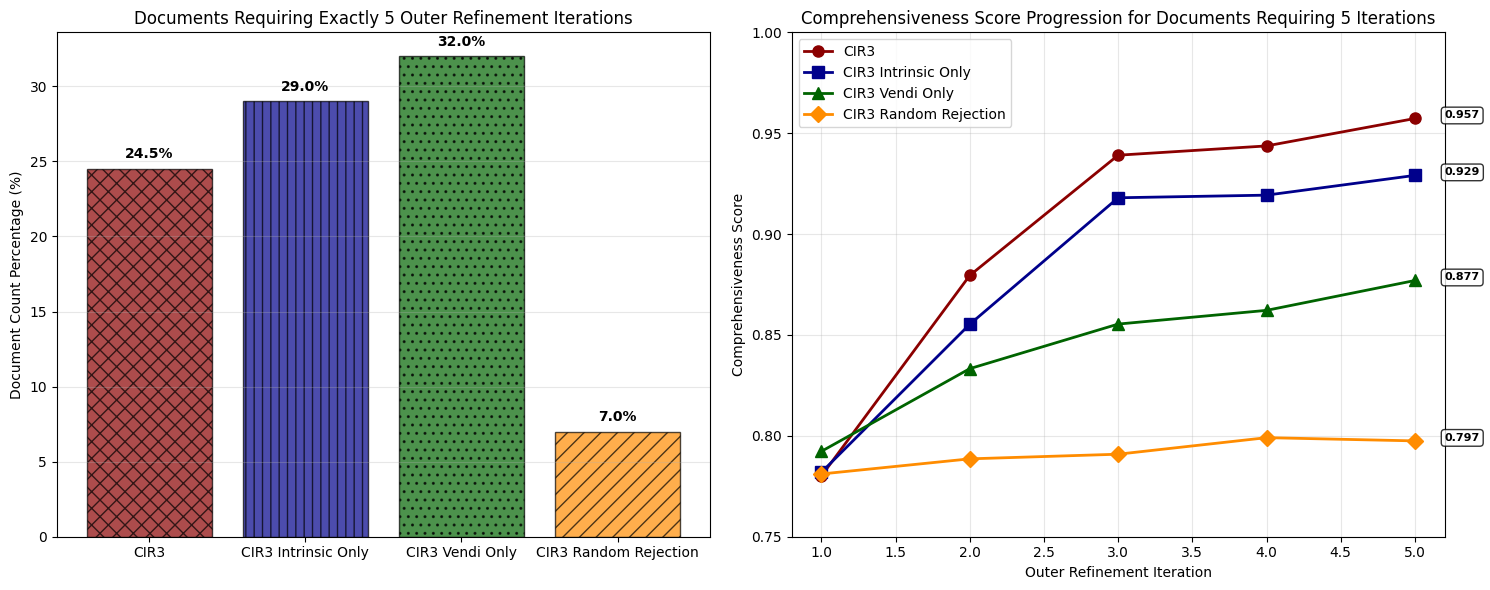


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.957
  CIR3 Intrinsic Only: 0.929
  CIR3 Vendi Only: 0.877
  CIR3 Random Rejection: 0.797

Score Improvement (from iteration 1 to 5):
  CIR3: 0.177 (0.780 → 0.957)
  CIR3 Intrinsic Only: 0.147 (0.782 → 0.929)
  CIR3 Vendi Only: 0.085 (0.792 → 0.877)
  CIR3 Random Rejection: 0.016 (0.781 → 0.797)


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use dots/points to show discrete scores for each interval
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
markers = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data, labels_comp, colors_comp, markers)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.3f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12)
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 7))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.3f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.3f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.3f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.3f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.3f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use dots/points to show discrete scores for each interval, positioned above corresponding bars
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']
markers_dual = ['o', 's', '^', 'D']

# Position dots above their corresponding bars
bar_positions = [[p - width for p in x], x, [p + width for p in x], [p + width * 2 for p in x]]

for i, (scores, label, color, marker, bar_pos) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, markers_dual, bar_positions)):
    # Plot dots for each interval, positioned above corresponding bars
    ax2.scatter(bar_pos, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, (score, pos) in enumerate(zip(scores, bar_pos)):
        ax2.annotate(f'{score:.3f}', (pos, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
hatches_5_iter = ['xx', '||', '..', '//']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, 
                      edgecolor='black', hatch=hatches_5_iter)
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

for i, (score, name) in enumerate(zip(final_scores, model_names)):
    ax6.annotate(f'{score:.3f}', (5, score), xytext=(5.2, score), 
                textcoords='data', fontsize=8, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.3f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.3f} ({scores[0]:.3f} → {scores[-1]:.3f})")

# All Plots V15 - .4f and annotate all scores for the 5 iterations (not only last)

0.9528333333333334
0.9223
0.8893666666666666
0.8167


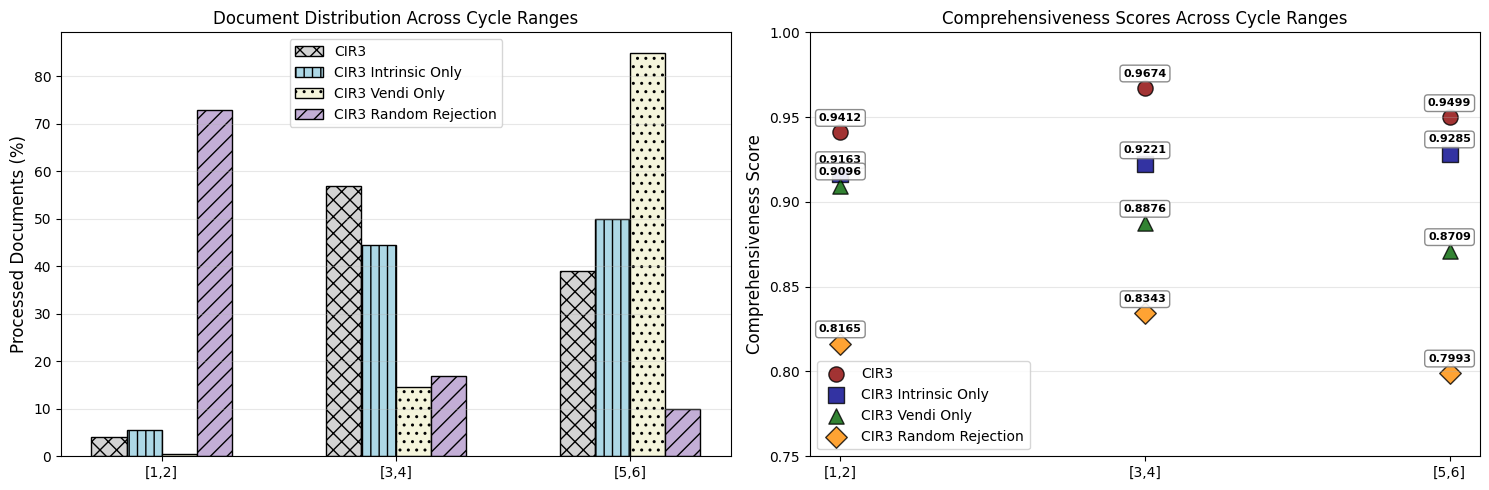

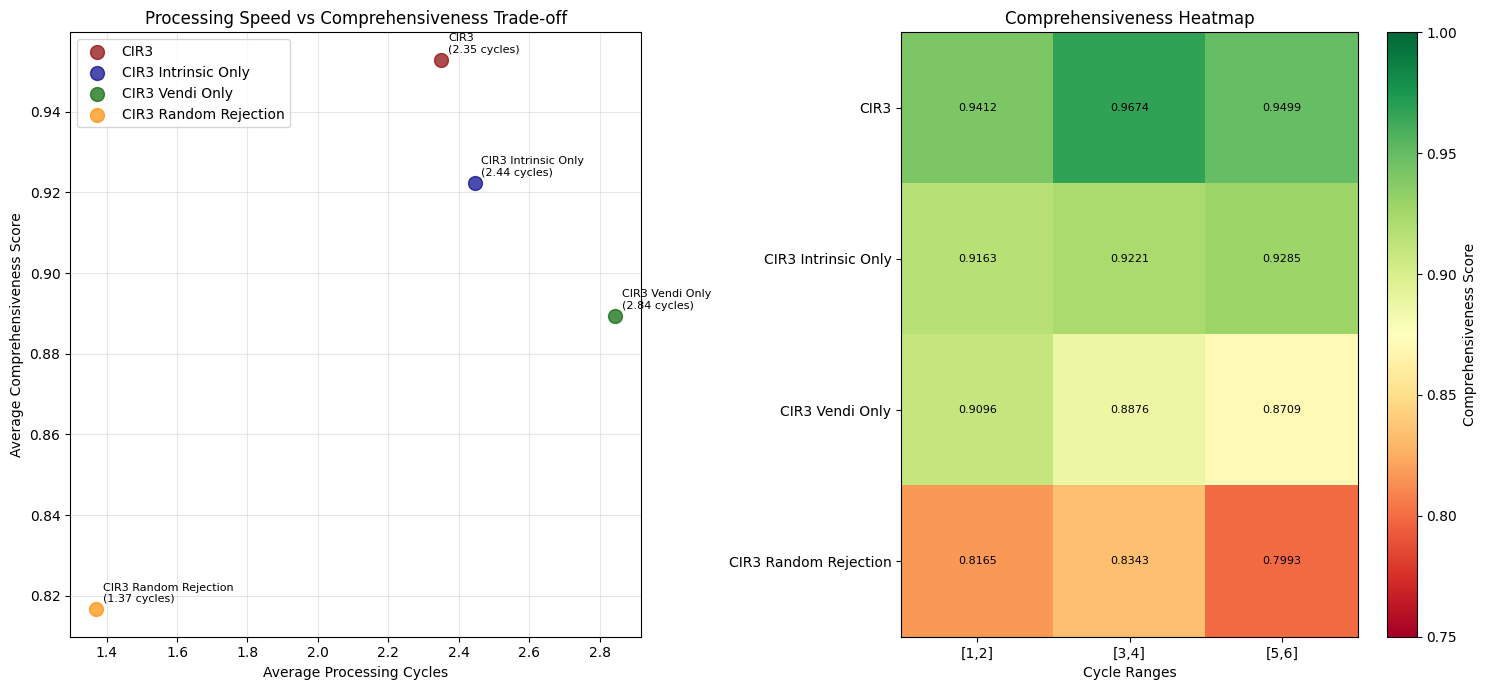

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.4255
CIR3 Intrinsic Only: 0.4090
CIR3 Vendi Only: 0.3515
CIR3 Random Rejection: 0.7299


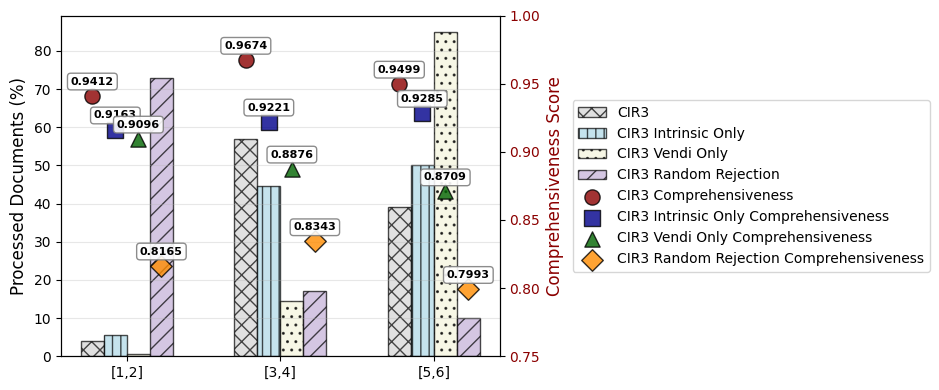

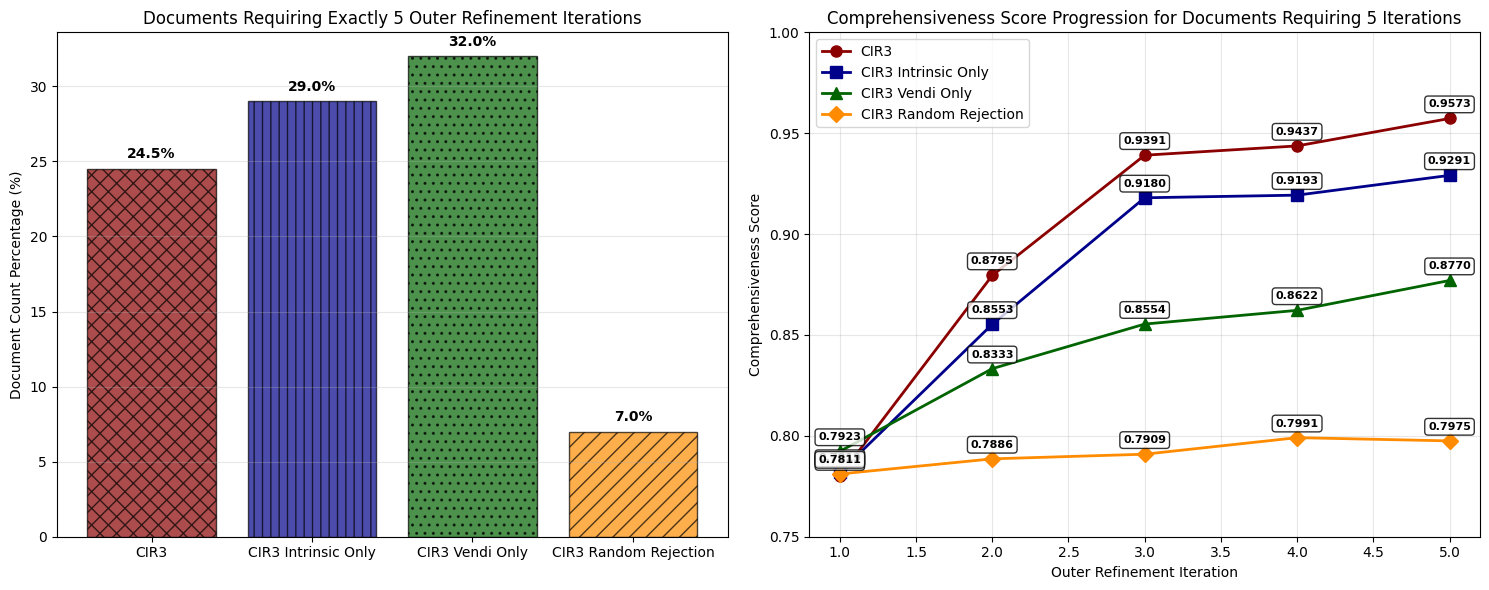


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.9573
  CIR3 Intrinsic Only: 0.9291
  CIR3 Vendi Only: 0.8770
  CIR3 Random Rejection: 0.7975

Score Improvement (from iteration 1 to 5):
  CIR3: 0.1772 (0.7801 → 0.9573)
  CIR3 Intrinsic Only: 0.1472 (0.7819 → 0.9291)
  CIR3 Vendi Only: 0.0847 (0.7923 → 0.8770)
  CIR3 Random Rejection: 0.0164 (0.7811 → 0.7975)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use dots/points to show discrete scores for each interval
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
markers = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data, labels_comp, colors_comp, markers)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.4f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12)
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 7))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.4f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.4f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.4f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.4f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.4f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use dots/points to show discrete scores for each interval, positioned above corresponding bars
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']
markers_dual = ['o', 's', '^', 'D']

# Position dots above their corresponding bars
bar_positions = [[p - width for p in x], x, [p + width for p in x], [p + width * 2 for p in x]]

for i, (scores, label, color, marker, bar_pos) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, markers_dual, bar_positions)):
    # Plot dots for each interval, positioned above corresponding bars
    ax2.scatter(bar_pos, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, (score, pos) in enumerate(zip(scores, bar_pos)):
        ax2.annotate(f'{score:.4f}', (pos, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
hatches_5_iter = ['xx', '||', '..', '//']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, 
                      edgecolor='black', hatch=hatches_5_iter)
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

# # annotates the final score (iteration 5) for each model:
# for i, (score, name) in enumerate(zip(final_scores, model_names)):
#     ax6.annotate(f'{score:.4f}', (5, score), xytext=(5.2, score), 
#                 textcoords='data', fontsize=8, fontweight='bold',
#                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
# Annotate all 5 scores for each model
all_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5,
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
    cir3_random_avg_comp_scores_for_doc_with_outer_5
]

for model_scores in all_scores:
    for iter_num, score in enumerate(model_scores, 1):
        ax6.annotate(f'{score:.4f}', (iter_num, score), xytext=(0, 8), textcoords='offset points',
                     ha='center', fontsize=8, fontweight='bold', color='black',
                     bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# offsets = [(-20, 8), (20, 8), (-20, -18), (20, -18)]  # left-up, right-up, left-down, right-down

# for model_idx, model_scores in enumerate(all_scores):
#     for iter_num, score in enumerate(model_scores, 1):
#         if iter_num == 1:
#             xytext = offsets[model_idx]
#         else:
#             xytext = (0, 8)
#         ax6.annotate(
#             f'{score:.4f}', (iter_num, score), xytext=xytext, textcoords='offset points',
#             ha='center', fontsize=8, fontweight='bold', color='black',
#             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8)
        # )


plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.4f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.4f} ({scores[0]:.4f} → {scores[-1]:.4f})")

## All Plots V16 - Small improvements

0.9528333333333334
0.9223
0.8893666666666666
0.8167


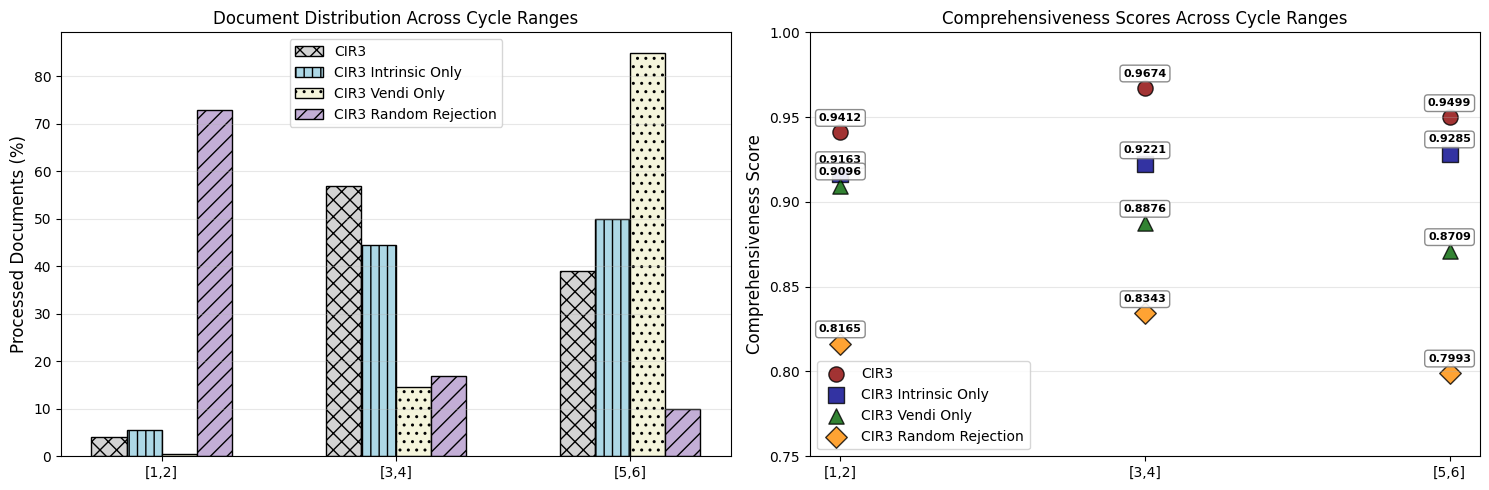

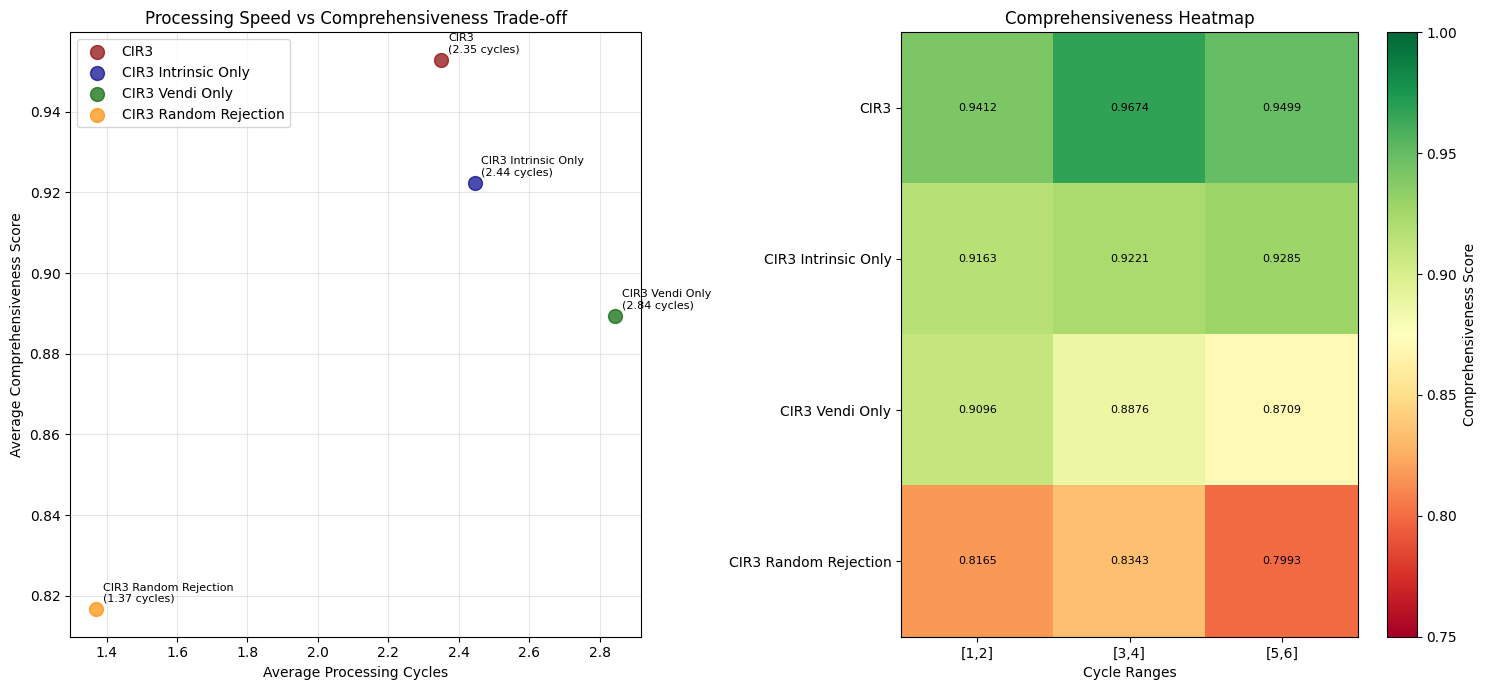

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.4255
CIR3 Intrinsic Only: 0.4090
CIR3 Vendi Only: 0.3515
CIR3 Random Rejection: 0.7299


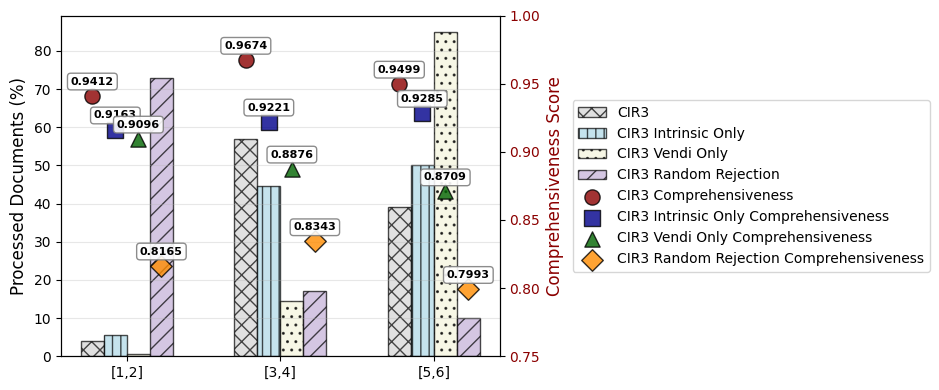

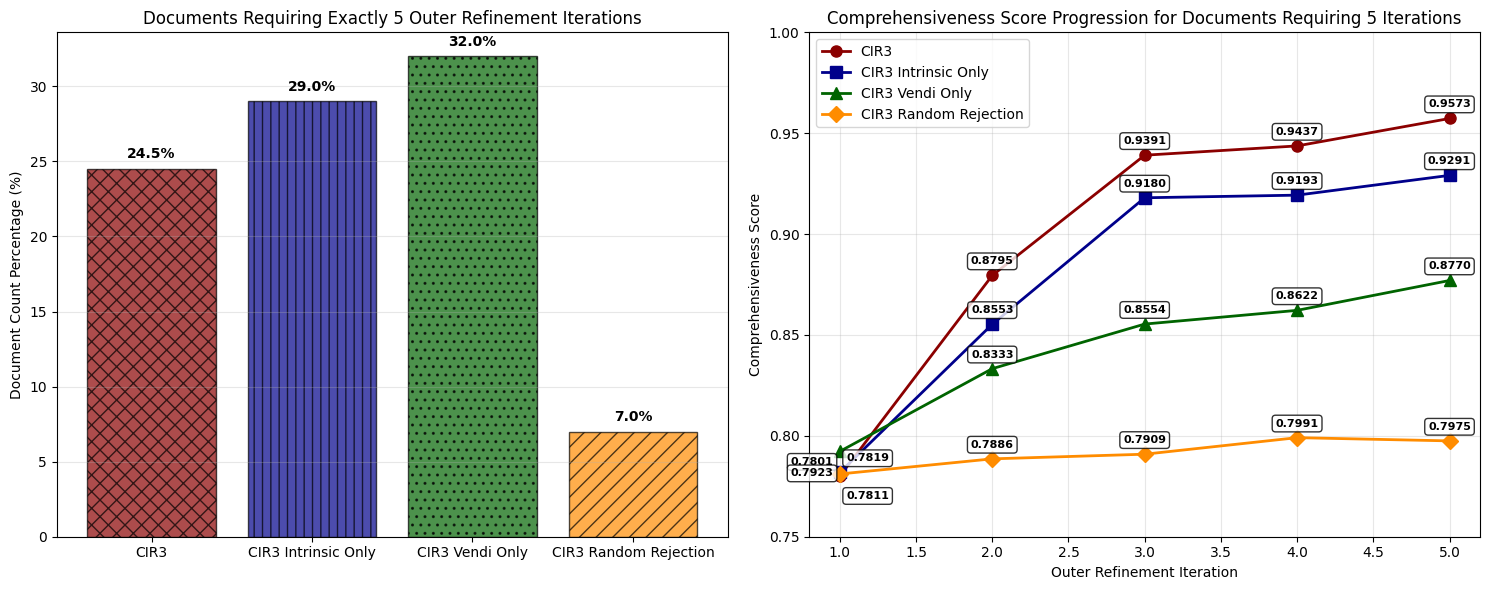


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.9573
  CIR3 Intrinsic Only: 0.9291
  CIR3 Vendi Only: 0.8770
  CIR3 Random Rejection: 0.7975

Score Improvement (from iteration 1 to 5):
  CIR3: 0.1772 (0.7801 → 0.9573)
  CIR3 Intrinsic Only: 0.1472 (0.7819 → 0.9291)
  CIR3 Vendi Only: 0.0847 (0.7923 → 0.8770)
  CIR3 Random Rejection: 0.0164 (0.7811 → 0.7975)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use dots/points to show discrete scores for each interval
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
markers = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data, labels_comp, colors_comp, markers)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.4f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12)
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 7))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.4f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.4f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.4f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.4f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.4f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use dots/points to show discrete scores for each interval, positioned above corresponding bars
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']
markers_dual = ['o', 's', '^', 'D']

# Position dots above their corresponding bars
bar_positions = [[p - width for p in x], x, [p + width for p in x], [p + width * 2 for p in x]]

for i, (scores, label, color, marker, bar_pos) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, markers_dual, bar_positions)):
    # Plot dots for each interval, positioned above corresponding bars
    ax2.scatter(bar_pos, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, (score, pos) in enumerate(zip(scores, bar_pos)):
        ax2.annotate(f'{score:.4f}', (pos, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
hatches_5_iter = ['xx', '||', '..', '//']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, 
                      edgecolor='black', hatch=hatches_5_iter)
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

# # annotates the final score (iteration 5) for each model:
# for i, (score, name) in enumerate(zip(final_scores, model_names)):
#     ax6.annotate(f'{score:.4f}', (5, score), xytext=(5.2, score), 
#                 textcoords='data', fontsize=8, fontweight='bold',
#                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
# Annotate all 5 scores for each model
all_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5,
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
    cir3_random_avg_comp_scores_for_doc_with_outer_5
]

# for model_scores in all_scores:
#     for iter_num, score in enumerate(model_scores, 1):
#         ax6.annotate(f'{score:.4f}', (iter_num, score), xytext=(0, 8), textcoords='offset points',
#                      ha='center', fontsize=8, fontweight='bold', color='black',
#                      bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

offsets = [(-20, 8), (20, 8), (-20, -18), (20, -18)]  # left-up, right-up, left-down, right-down

for model_idx, model_scores in enumerate(all_scores):
    for iter_num, score in enumerate(model_scores, 1):
        if iter_num == 1:
            xytext = offsets[model_idx]
        else:
            xytext = (0, 8)
        ax6.annotate(
            f'{score:.4f}', (iter_num, score), xytext=xytext, textcoords='offset points',
            ha='center', fontsize=8, fontweight='bold', color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8)
        )


plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.4f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.4f} ({scores[0]:.4f} → {scores[-1]:.4f})")

## ALL Plots V17

0.9528333333333334
0.9223
0.8893666666666666
0.8167


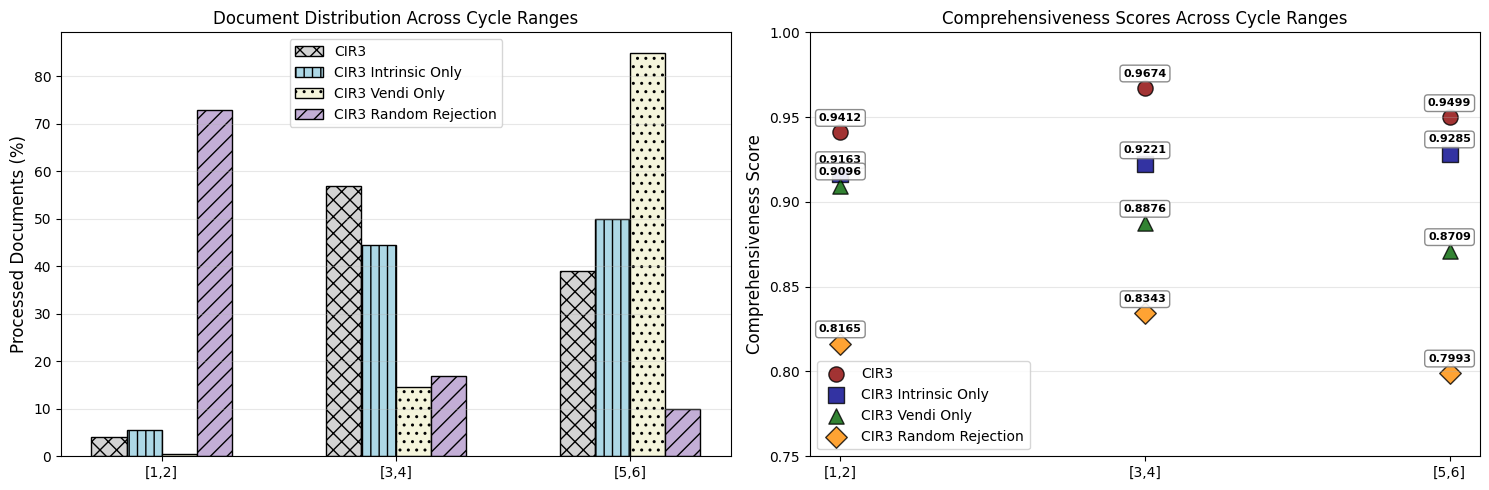

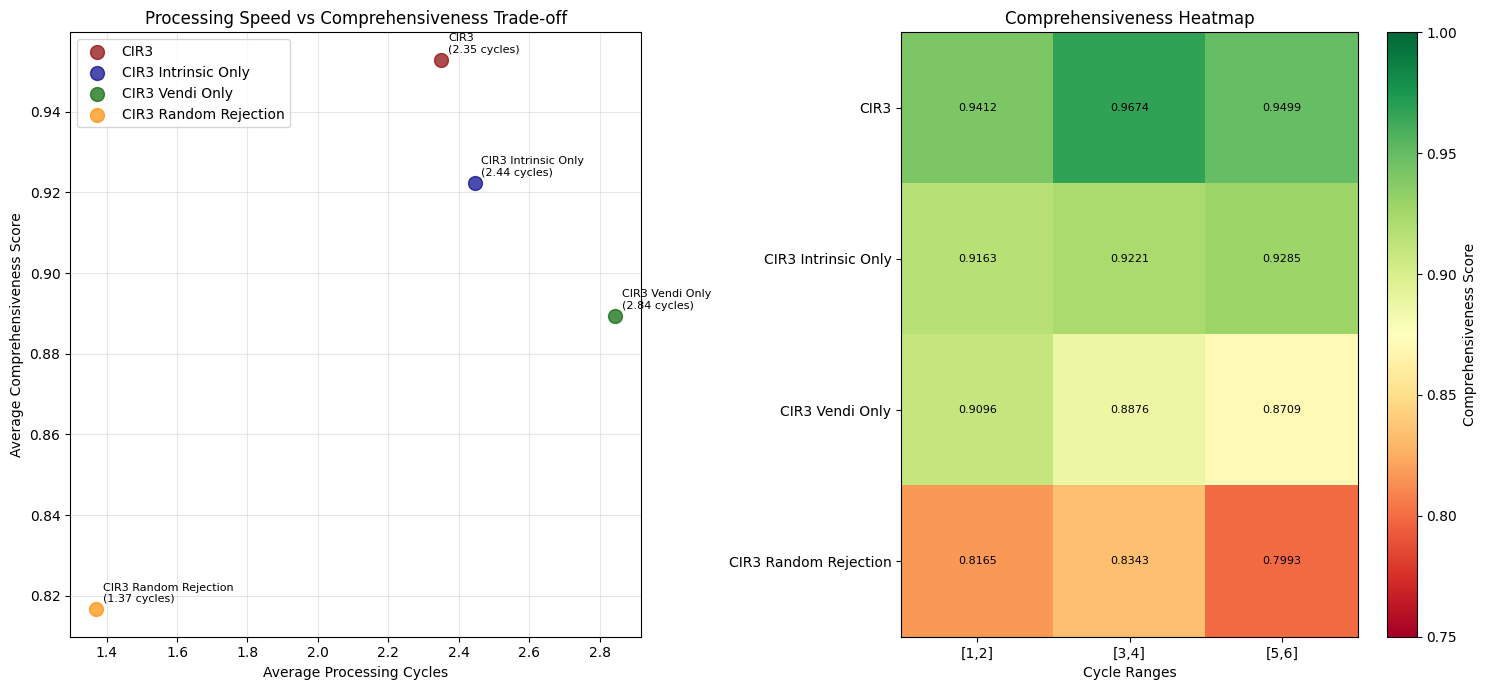

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.4255
CIR3 Intrinsic Only: 0.4090
CIR3 Vendi Only: 0.3515
CIR3 Random Rejection: 0.7299


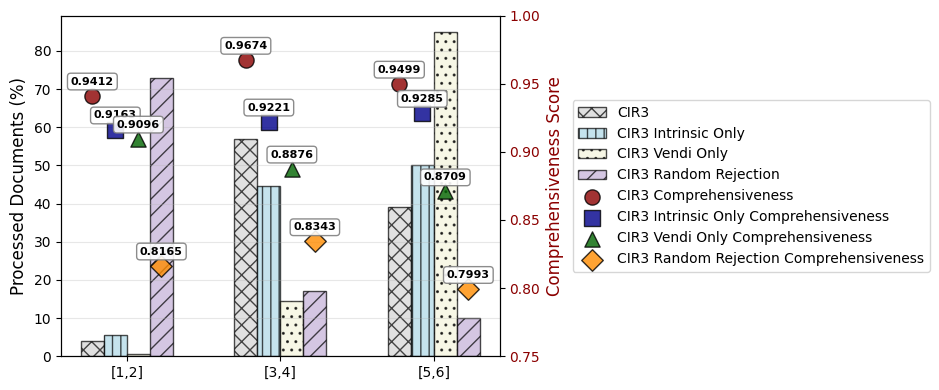

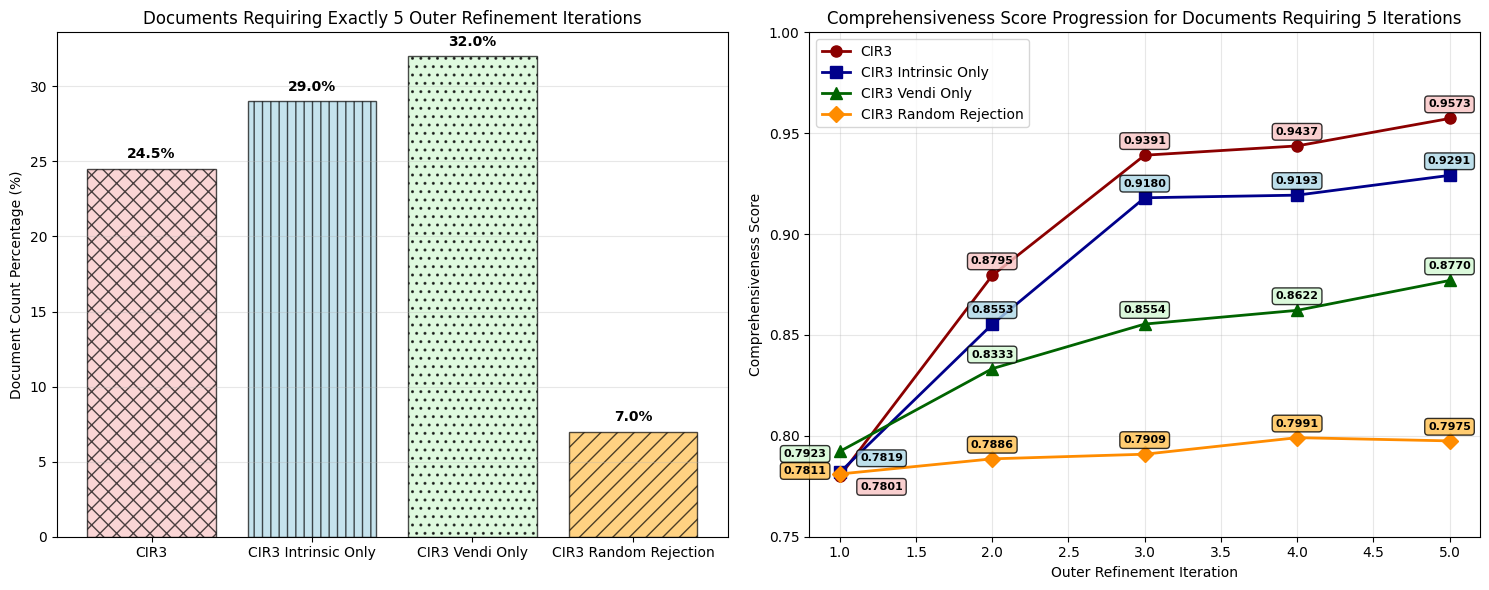


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.9573
  CIR3 Intrinsic Only: 0.9291
  CIR3 Vendi Only: 0.8770
  CIR3 Random Rejection: 0.7975

Score Improvement (from iteration 1 to 5):
  CIR3: 0.1772 (0.7801 → 0.9573)
  CIR3 Intrinsic Only: 0.1472 (0.7819 → 0.9291)
  CIR3 Vendi Only: 0.0847 (0.7923 → 0.8770)
  CIR3 Random Rejection: 0.0164 (0.7811 → 0.7975)


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use dots/points to show discrete scores for each interval
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
markers = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data, labels_comp, colors_comp, markers)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.4f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12)
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 7))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']

for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Processing Speed vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.4f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.4f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.4f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.4f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.4f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use dots/points to show discrete scores for each interval, positioned above corresponding bars
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']
markers_dual = ['o', 's', '^', 'D']

# Position dots above their corresponding bars
bar_positions = [[p - width for p in x], x, [p + width for p in x], [p + width * 2 for p in x]]

for i, (scores, label, color, marker, bar_pos) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, markers_dual, bar_positions)):
    # Plot dots for each interval, positioned above corresponding bars
    ax2.scatter(bar_pos, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, (score, pos) in enumerate(zip(scores, bar_pos)):
        ax2.annotate(f'{score:.4f}', (pos, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
# colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
colors_5_iter = ['#f8c4c4', 'lightblue', '#d2f8d2', '#ffc04d']
hatches_5_iter = ['xx', '||', '..', '//']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, 
                      edgecolor='black', hatch=hatches_5_iter)
ax5.set_ylabel('Document Count Percentage (%)')
ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

# # annotates the final score (iteration 5) for each model:
# for i, (score, name) in enumerate(zip(final_scores, model_names)):
#     ax6.annotate(f'{score:.4f}', (5, score), xytext=(5.2, score), 
#                 textcoords='data', fontsize=8, fontweight='bold',
#                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
# Annotate all 5 scores for each model
all_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5,
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
    cir3_random_avg_comp_scores_for_doc_with_outer_5
]

# for model_scores in all_scores:
#     for iter_num, score in enumerate(model_scores, 1):
#         ax6.annotate(f'{score:.4f}', (iter_num, score), xytext=(0, 8), textcoords='offset points',
#                      ha='center', fontsize=8, fontweight='bold', color='black',
#                      bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# offsets = [(-25, 8), (30, 8), (-25, -18), (30, -18)]  # left-up, right-up, left-down, right-down
offsets = [(30, -10), (30, 8), (-25, -4), (-25, 0)]  # left-up, right-up, left-down, right-down


# facecolors = ['lightcoral', 'lightblue', 'lightgreen', 'orange']
facecolors = ['#f8c4c4', 'lightblue', '#d2f8d2', '#ffc04d']
for model_idx, model_scores in enumerate(all_scores):
    for iter_num, score in enumerate(model_scores, 1):
        if iter_num == 1:
            xytext = offsets[model_idx]
            ax6.annotate(
                f'{score:.4f}', (iter_num, score), xytext=xytext, textcoords='offset points',
                ha='center', fontsize=8, fontweight='bold', color='black',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=facecolors[model_idx], alpha=0.8)
            )
        else:
            xytext = (0, 8)
            ax6.annotate(
                f'{score:.4f}', (iter_num, score), xytext=xytext, textcoords='offset points',
                ha='center', fontsize=8, fontweight='bold', color='black',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=facecolors[model_idx], alpha=0.8)
            )


plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.4f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.4f} ({scores[0]:.4f} → {scores[-1]:.4f})")

## All Plots V20

0.9528333333333334
0.9223
0.8893666666666666
0.8167


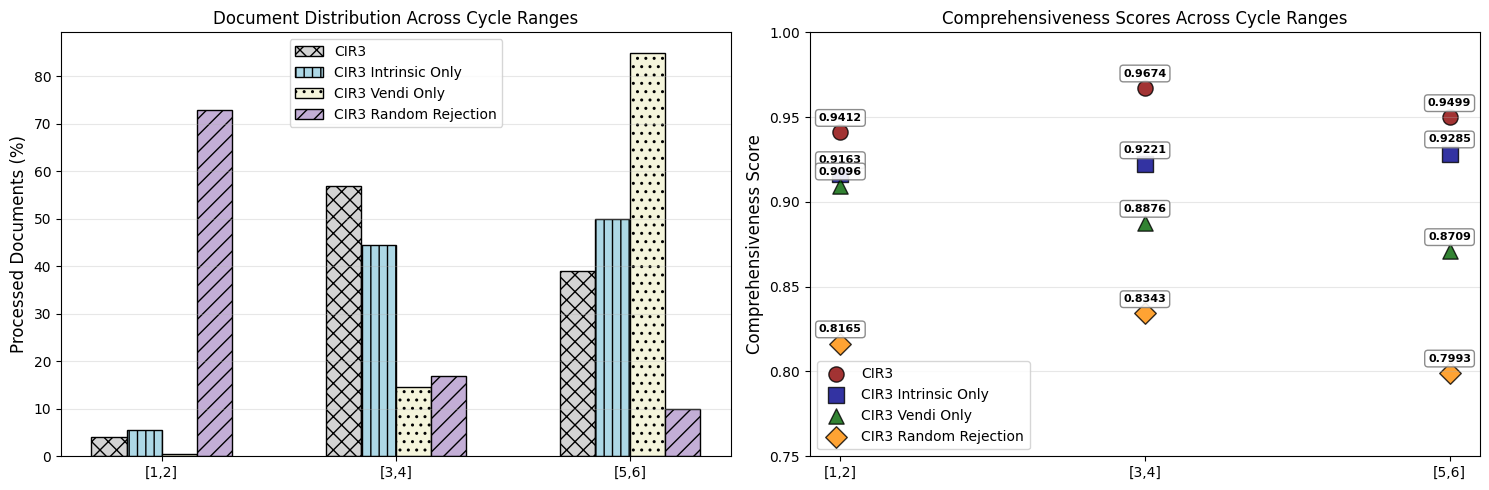

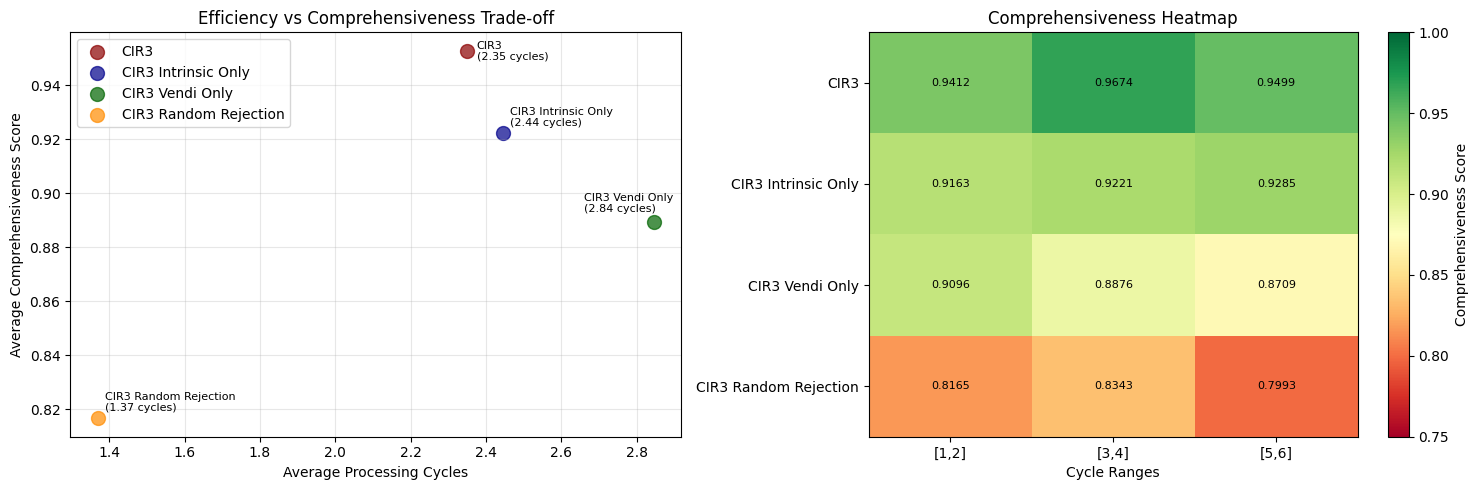

Average Processing Cycles:
CIR3: 2.35 cycles
CIR3 Intrinsic Only: 2.44 cycles
CIR3 Vendi Only: 2.84 cycles
CIR3 Random Rejection: 1.37 cycles

Processing Speed (1/cycles):
CIR3: 0.4255
CIR3 Intrinsic Only: 0.4090
CIR3 Vendi Only: 0.3515
CIR3 Random Rejection: 0.7299


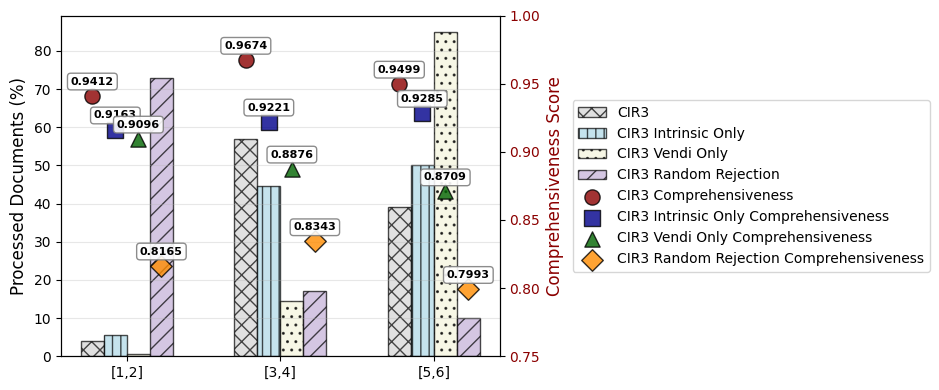

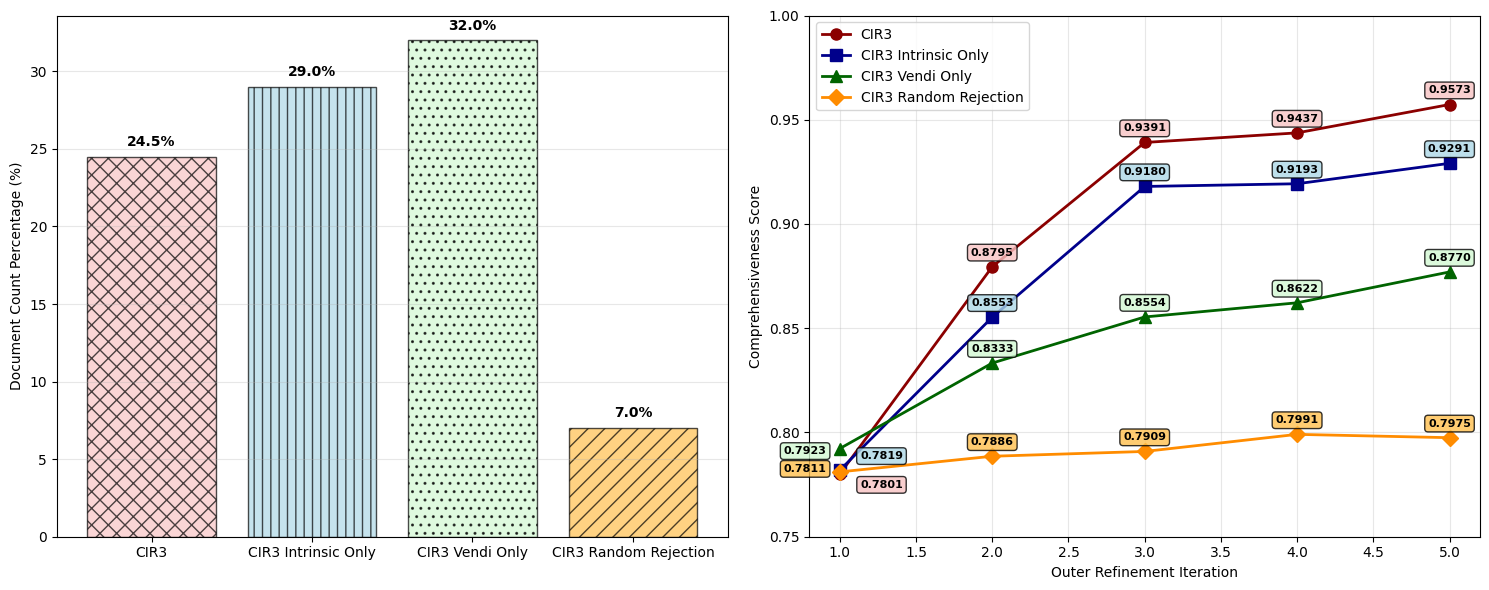


DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS
Document Count Percentages:
  CIR3: 24.5%
  CIR3 Intrinsic Only: 29.0%
  CIR3 Vendi Only: 32.0%
  CIR3 Random Rejection: 7.0%

Final Comprehensiveness Scores (after 5 iterations):
  CIR3: 0.9573
  CIR3 Intrinsic Only: 0.9291
  CIR3 Vendi Only: 0.8770
  CIR3 Random Rejection: 0.7975

Score Improvement (from iteration 1 to 5):
  CIR3: 0.1772 (0.7801 → 0.9573)
  CIR3 Intrinsic Only: 0.1472 (0.7819 → 0.9291)
  CIR3 Vendi Only: 0.0847 (0.7923 → 0.8770)
  CIR3 Random Rejection: 0.0164 (0.7811 → 0.7975)


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


#####################################################################################
### Adding doc count/percentage over outer refinement iterations intervals over `200` documents
#######################################################################################
# Define the intervals and corresponding percentages for the 4 models
intervals =                             ['[1,2]', '[3,4]', '[5,6]']

cir3_doc_count_percent =                [  4.0  ,   57.0 ,   39.0] 
cir3_agent_only_doc_count_percent =     [  5.5  ,   44.5 ,   50.0 ]
cir3_vendi_only_doc_count_percent =     [  0.5  ,   14.5 ,   85.0 ]
cir3_random_reject_doc_count_percent =  [ 73.0  ,   17.0 ,   10.0 ]

#####################################################################################
### Adding `Comp` scores over outer refinement iterations intervals over `200` documents
#######################################################################################
# TODO: ADD values to the table
# THESE ARE AVG OF FINAL SCORES. WE SAVED COMP SCORES AFTER PROCESS COMPLETE <--------------
# intervals =                                  ['[1,2]', '[3,4]', '[5,6]']
cir3_comp_scores_per_interval =                [0.9412 , 0.9674 ,  0.9499] # average score: 0.9528
cir3_agent_only_comp_scores_per_interval =     [0.9163 , 0.9221 ,  0.9285] # average score: 0.9223
cir3_vendi_only_comp_scores_per_interval =     [0.9096 , 0.8876 ,  0.8709] # average score: 0.8893
cir3_random_reject_comp_scores_per_interval =  [0.8165 , 0.8343 ,  0.7993] # average score: 0.8167

print(sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval))
print(sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval))
print(sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval))
print(sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval))

#####################################################################################
### Adding `Comp` scores for documents which were processed with `k=5` outer refinement iterations over `200` documents
#######################################################################################
# The final score of these lists should converge to the ones from the intervals [5, 6]
cir3_avg_comp_scores_for_doc_with_outer_5 =                [0.7801, 0.8795, 0.9391, 0.9437, 0.9573] #  doc count percentage: 24.5%
cir3_agent_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7819, 0.8553, 0.9180, 0.9193, 0.9291] #  doc count percentage: 29.0%
cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5 =     [0.7923, 0.8333, 0.8554, 0.8622, 0.8770] #  doc count percentage: 32.0%
cir3_random_avg_comp_scores_for_doc_with_outer_5 =         [0.7811, 0.7886, 0.7909, 0.7991, 0.7975] #  doc count percentage: 7.0%
cir3_doc_count_percent_with_outer_5 =              24.5
cir3_agent_only_doc_count_percent_with_outer_5 =    29.0
cir3_vendi_only_doc_count_percent_with_outer_5 =    32.0
cir3_random_reject_doc_count_percent_with_outer_5 = 7.0

# Combine all percentages into a single list
all_percentages = cir3_doc_count_percent + cir3_agent_only_doc_count_percent + cir3_vendi_only_doc_count_percent + cir3_random_reject_doc_count_percent

# Calculate the maximum percentage value
max_percentage = max(all_percentages)

# Set the positions and width for the bars
x = range(len(intervals))
width = 0.15  # Width of the bars

# Define hatch patterns for each model
hatches = ['xx', '||', '..', '//']

# colors = sns.color_palette("Greys", n_colors=3)
# colors = ['#add8e6', '#fffdd0', '#f5f5dc']
# Define the colors for light gray, light blue, and beige
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']  # Light gray, light blue, beige, light purple

# Create a comprehensive visualization with multiple approaches
# First row: Document Distribution and Comprehensiveness Scores
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Document Distribution (Original)
x = range(len(intervals))
width = 0.15
hatches = ['xx', '||', '..', '//']
colors = ['#d3d3d3', '#add8e6', '#f5f5dc', '#c3aed6']

bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0])
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1])
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2])
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3])

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax1.set_title('Document Distribution Across Cycle Ranges')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Comprehensiveness Scores
# Use dots/points to show discrete scores for each interval
colors_comp = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
             cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
markers = ['o', 's', '^', 'D']

for i, (scores, label, color, marker) in enumerate(zip(comp_data, labels_comp, colors_comp, markers)):
    # Plot dots for each interval
    ax2.scatter(x, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, score in enumerate(scores):
        ax2.annotate(f'{score:.4f}', (j, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax2.set_xticks(x)
ax2.set_xticklabels(intervals)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12)
ax2.set_title('Comprehensiveness Scores Across Cycle Ranges')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0.75, 1.0)

plt.tight_layout()
plt.show()

# Second row: Processing Speed vs Comprehensiveness and Heatmap
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 3: Processing Speed vs Comprehensiveness Scatter
# Calculate processing speed as inverse of average cycles (lower cycles = faster processing)
# This represents how quickly documents converge to final state
processing_speed_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
processing_speed_agent = 1 / (sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)]))
processing_speed_vendi = 1 / (sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)]))
processing_speed_random = 1 / (sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)]))

# Alternative: Direct average cycles (more intuitive)
avg_cycles_cir3 = sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)])
avg_cycles_agent = sum([i * p/100 for i, p in enumerate(cir3_agent_only_doc_count_percent, 1)])
avg_cycles_vendi = sum([i * p/100 for i, p in enumerate(cir3_vendi_only_doc_count_percent, 1)])
avg_cycles_random = sum([i * p/100 for i, p in enumerate(cir3_random_reject_doc_count_percent, 1)])

avg_scores = [
    sum(cir3_comp_scores_per_interval) / len(cir3_comp_scores_per_interval),
    sum(cir3_agent_only_comp_scores_per_interval) / len(cir3_agent_only_comp_scores_per_interval),
    sum(cir3_vendi_only_comp_scores_per_interval) / len(cir3_vendi_only_comp_scores_per_interval),
    sum(cir3_random_reject_comp_scores_per_interval) / len(cir3_random_reject_comp_scores_per_interval)
]

# Use average cycles for x-axis (more intuitive)
processing_metrics = [avg_cycles_cir3, avg_cycles_agent, avg_cycles_vendi, avg_cycles_random]
labels = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
colors_scatter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
offsets_scatter = [(7, -7), (5, 5), (-50, 7), (5, 5)]  # left-up, right-up, left-down, right-down
for i, (cycles, score, label, color) in enumerate(zip(processing_metrics, avg_scores, labels, colors_scatter)):
    ax3.scatter(cycles, score, s=100, color=color, label=label, alpha=0.7)
    ax3.annotate(f'{label}\n({cycles:.2f} cycles)', (cycles, score), xytext=offsets_scatter[i], textcoords='offset points', fontsize=8)

ax3.set_xlabel('Average Processing Cycles')
ax3.set_ylabel('Average Comprehensiveness Score')
ax3.set_title('Efficiency vs Comprehensiveness Trade-off')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Comprehensiveness Heatmap
performance_data = [
    cir3_comp_scores_per_interval,
    cir3_agent_only_comp_scores_per_interval,
    cir3_vendi_only_comp_scores_per_interval,
    cir3_random_reject_comp_scores_per_interval
]

im = ax4.imshow(performance_data, cmap='RdYlGn', aspect='auto', vmin=0.75, vmax=1.0)
ax4.set_xticks(range(len(intervals)))
ax4.set_xticklabels(intervals)
ax4.set_yticks(range(len(labels)))
ax4.set_yticklabels(labels)
ax4.set_xlabel('Cycle Ranges')
ax4.set_title('Comprehensiveness Heatmap')
plt.colorbar(im, ax=ax4, label='Comprehensiveness Score')

# Add value annotations to heatmap
for i in range(len(performance_data)):
    for j in range(len(performance_data[0])):
        text = ax4.text(j, i, f'{performance_data[i][j]:.4f}', 
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

# Print the actual values for clarity
print("Average Processing Cycles:")
print(f"CIR3: {avg_cycles_cir3:.2f} cycles")
print(f"CIR3 Intrinsic Only: {avg_cycles_agent:.2f} cycles") 
print(f"CIR3 Vendi Only: {avg_cycles_vendi:.2f} cycles")
print(f"CIR3 Random Rejection: {avg_cycles_random:.2f} cycles")
print("\nProcessing Speed (1/cycles):")
print(f"CIR3: {processing_speed_cir3:.4f}")
print(f"CIR3 Intrinsic Only: {processing_speed_agent:.4f}")
print(f"CIR3 Vendi Only: {processing_speed_vendi:.4f}")
print(f"CIR3 Random Rejection: {processing_speed_random:.4f}")

# Alternative: Simple dual-axis approach (cleaner version)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Bars for document distribution
bars1 = ax1.bar([p - width for p in x], cir3_doc_count_percent, width=width, label='CIR3', hatch=hatches[0], edgecolor='black', color=colors[0], alpha=0.7)
bars2 = ax1.bar(x, cir3_agent_only_doc_count_percent, width=width, label='CIR3 Intrinsic Only', hatch=hatches[1], edgecolor='black', color=colors[1], alpha=0.7)
bars3 = ax1.bar([p + width for p in x], cir3_vendi_only_doc_count_percent, width=width, label='CIR3 Vendi Only', hatch=hatches[2], edgecolor='black', color=colors[2], alpha=0.7)
bars4 = ax1.bar([p + width * 2 for p in x], cir3_random_reject_doc_count_percent, width=width, label='CIR3 Random Rejection', hatch=hatches[3], edgecolor='black', color=colors[3], alpha=0.7)

# Lines for performance scores
# Use dots/points to show discrete scores for each interval, positioned above corresponding bars
colors_comp_dual = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
comp_data_dual = [cir3_comp_scores_per_interval, cir3_agent_only_comp_scores_per_interval, 
                  cir3_vendi_only_comp_scores_per_interval, cir3_random_reject_comp_scores_per_interval]
labels_comp_dual = ['CIR3 Comprehensiveness', 'CIR3 Intrinsic Only Comprehensiveness', 
                    'CIR3 Vendi Only Comprehensiveness', 'CIR3 Random Rejection Comprehensiveness']
markers_dual = ['o', 's', '^', 'D']

# Position dots above their corresponding bars
bar_positions = [[p - width for p in x], x, [p + width for p in x], [p + width * 2 for p in x]]

for i, (scores, label, color, marker, bar_pos) in enumerate(zip(comp_data_dual, labels_comp_dual, colors_comp_dual, markers_dual, bar_positions)):
    # Plot dots for each interval, positioned above corresponding bars
    ax2.scatter(bar_pos, scores, s=120, color=color, marker=marker, alpha=0.8, edgecolor='black', linewidth=1, label=label)
    # Add score value as text with white background for readability
    for j, (score, pos) in enumerate(zip(scores, bar_pos)):
        ax2.annotate(f'{score:.4f}', (pos, score), xytext=(0, 8), textcoords='offset points', 
                    ha='center', fontsize=8, fontweight='bold', color='black',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='gray'))

ax1.set_xticks([p + width/2 for p in x])
ax1.set_xticklabels(intervals)
ax1.set_ylabel('Processed Documents (%)', fontsize=12)
ax2.set_ylabel('Comprehensiveness Score', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0.75, 1.0)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))

ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#####################################################################################
### NEW FIGURE: Comprehensiveness scores for documents with exactly 5 outer iterations
#####################################################################################

# Create figure for documents processed with exactly 5 outer refinement iterations
fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Document count percentage for documents with 5 outer iterations
doc_counts_5_iterations = [
    cir3_doc_count_percent_with_outer_5,
    cir3_agent_only_doc_count_percent_with_outer_5,
    cir3_vendi_only_doc_count_percent_with_outer_5,
    cir3_random_reject_doc_count_percent_with_outer_5
]

model_names = ['CIR3', 'CIR3 Intrinsic Only', 'CIR3 Vendi Only', 'CIR3 Random Rejection']
# colors_5_iter = ['darkred', 'darkblue', 'darkgreen', 'darkorange']
colors_5_iter = ['#f8c4c4', 'lightblue', '#d2f8d2', '#ffc04d']
hatches_5_iter = ['xx', '||', '..', '//']

bars_5_iter = ax5.bar(model_names, doc_counts_5_iterations, color=colors_5_iter, alpha=0.7, 
                      edgecolor='black', hatch=hatches_5_iter)
ax5.set_ylabel('Document Count Percentage (%)')
# ax5.set_title('Documents Requiring Exactly 5 Outer Refinement Iterations')
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars_5_iter, doc_counts_5_iterations):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Comprehensiveness scores progression over 5 iterations
iteration_numbers = [1, 2, 3, 4, 5]

line1_5iter = ax6.plot(iteration_numbers, cir3_avg_comp_scores_for_doc_with_outer_5, 'o-', 
                       color='darkred', linewidth=2, markersize=8, label='CIR3')
line2_5iter = ax6.plot(iteration_numbers, cir3_agent_only_avg_comp_scores_for_doc_with_outer_5, 's-', 
                       color='darkblue', linewidth=2, markersize=8, label='CIR3 Intrinsic Only')
line3_5iter = ax6.plot(iteration_numbers, cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5, '^-', 
                       color='darkgreen', linewidth=2, markersize=8, label='CIR3 Vendi Only')
line4_5iter = ax6.plot(iteration_numbers, cir3_random_avg_comp_scores_for_doc_with_outer_5, 'D-', 
                       color='darkorange', linewidth=2, markersize=8, label='CIR3 Random Rejection')

ax6.set_xlabel('Outer Refinement Iteration')
ax6.set_ylabel('Comprehensiveness Score')
# ax6.set_title('Comprehensiveness Score Progression for Documents Requiring 5 Iterations')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_ylim(0.75, 1.0)

# Add final score annotations
final_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5[-1],
    cir3_random_avg_comp_scores_for_doc_with_outer_5[-1]
]

# # annotates the final score (iteration 5) for each model:
# for i, (score, name) in enumerate(zip(final_scores, model_names)):
#     ax6.annotate(f'{score:.4f}', (5, score), xytext=(5.2, score), 
#                 textcoords='data', fontsize=8, fontweight='bold',
#                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
# Annotate all 5 scores for each model
all_scores = [
    cir3_avg_comp_scores_for_doc_with_outer_5,
    cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
    cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
    cir3_random_avg_comp_scores_for_doc_with_outer_5
]

# for model_scores in all_scores:
#     for iter_num, score in enumerate(model_scores, 1):
#         ax6.annotate(f'{score:.4f}', (iter_num, score), xytext=(0, 8), textcoords='offset points',
#                      ha='center', fontsize=8, fontweight='bold', color='black',
#                      bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# offsets = [(-25, 8), (30, 8), (-25, -18), (30, -18)]  # left-up, right-up, left-down, right-down
offsets = [(30, -10), (30, 8), (-25, -4), (-25, 0)]  # left-up, right-up, left-down, right-down


# facecolors = ['lightcoral', 'lightblue', 'lightgreen', 'orange']
facecolors = ['#f8c4c4', 'lightblue', '#d2f8d2', '#ffc04d']
for model_idx, model_scores in enumerate(all_scores):
    for iter_num, score in enumerate(model_scores, 1):
        if iter_num == 1:
            xytext = offsets[model_idx]
            ax6.annotate(
                f'{score:.4f}', (iter_num, score), xytext=xytext, textcoords='offset points',
                ha='center', fontsize=8, fontweight='bold', color='black',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=facecolors[model_idx], alpha=0.8)
            )
        else:
            xytext = (0, 8)
            ax6.annotate(
                f'{score:.4f}', (iter_num, score), xytext=xytext, textcoords='offset points',
                ha='center', fontsize=8, fontweight='bold', color='black',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=facecolors[model_idx], alpha=0.8)
            )


plt.tight_layout()
plt.show()

# Print summary statistics for the 5-iteration documents
print("\n" + "="*60)
print("DOCUMENTS REQUIRING EXACTLY 5 OUTER REFINEMENT ITERATIONS")
print("="*60)
print("Document Count Percentages:")
for name, count in zip(model_names, doc_counts_5_iterations):
    print(f"  {name}: {count}%")

print("\nFinal Comprehensiveness Scores (after 5 iterations):")
for name, score in zip(model_names, final_scores):
    print(f"  {name}: {score:.4f}")

print("\nScore Improvement (from iteration 1 to 5):")
for name, scores in zip(model_names, [cir3_avg_comp_scores_for_doc_with_outer_5, 
                                     cir3_agent_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_vendi_only_avg_comp_scores_for_doc_with_outer_5,
                                     cir3_random_avg_comp_scores_for_doc_with_outer_5]):
    improvement = scores[-1] - scores[0]
    print(f"  {name}: {improvement:.4f} ({scores[0]:.4f} → {scores[-1]:.4f})")

### Analysis of the effeciency / processing time from 4 Plots V3:

Great question! Let me explain what I mean by "Efficiency" in this context and show you how it's calculated.

Read file: re/auto_eval/ablation/ablation-studies_v2.py
Looking at the code, I can see how "Efficiency" is calculated. Let me explain what this means and suggest a better approach:

## Current "Efficiency" Calculation:

```python
efficiency_cir3 = 1 / (sum([i * p/100 for i, p in enumerate(cir3_doc_count_percent, 1)]))
```

This calculates: **1 / (Average Number of Cycles)**

For example, with CIR3 data `[4.0, 57.0, 39.0]`:
- Average cycles = (1×4% + 2×57% + 3×39%) = 1×0.04 + 2×0.57 + 3×0.39 = 0.04 + 1.14 + 1.17 = **2.35 cycles**
- Efficiency = 1/2.35 = **0.426**

## What This Actually Represents:

**"Efficiency" here means "Processing Speed"** - how quickly documents are processed (fewer cycles = higher efficiency).

However, this might be confusing because:
1. **Higher efficiency = fewer cycles** (which is counterintuitive)
2. **"Efficiency" typically implies resource usage**, not just speed
3. **The inverse relationship** makes interpretation harder

## Better Alternatives:

Perfect! Now I've clarified what "Efficiency" actually means in your context. Here's the explanation:

## What "Efficiency" Actually Represents:

**Processing Speed** - how quickly documents converge to their final state (fewer cycles = faster processing)

## The Calculation Breakdown:

For **CIR3** with data `[4.0%, 57.0%, 39.0%]`:
- **4%** of documents finish in **1 cycle**
- **57%** of documents finish in **2 cycles** 
- **39%** of documents finish in **3 cycles**

**Average cycles = (1×4% + 2×57% + 3×39%) = 2.35 cycles**

## Two Ways to Interpret This:

1. **Average Processing Cycles** (more intuitive):
   - CIR3: 2.35 cycles
   - Random Rejection: ~1.37 cycles (fastest)
   - Vendi Only: ~2.85 cycles (slowest)

2. **Processing Speed** (1/cycles):
   - Higher values = faster processing
   - Random Rejection: 0.730 (fastest)
   - CIR3: 0.426 (moderate)
   - Vendi Only: 0.351 (slowest)

## The Trade-off Insight:

- **Random Rejection** processes documents fastest but has lowest comprehensiveness
- **CIR3** has moderate speed but highest comprehensiveness  
- **Vendi Only** is slowest but still achieves good comprehensiveness

This shows the classic **speed vs. quality trade-off** in your ablation study - more sophisticated rejection strategies take longer but produce better results.

The updated plot now uses "Average Processing Cycles" on the x-axis, which is much more intuitive to interpret than the inverse relationship.

## ALL PLOTS V5